In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - partner_i oficial data

## Reading the dataset

In [3]:
xls = pd.ExcelFile(
    "../../../data/raw/partner_i-Oficial/DB_Master_CP1_latest v03.06.xlsx",
    engine="openpyxl",
)
df = pd.read_excel(xls, "DB3 Cimento Shipping", header=[1, 2])

<IPython.core.display.Javascript object>

## Initial Preprocessing

In [4]:
df = pd.concat([df["Date"], df["Time"], df["Composition"], df["Properties"]], axis=1)
df = df.drop([0, 1, 2], axis=0).reset_index(drop=True)

df = pd.concat(
    [
        df["Production"].iloc[:, 0],
        df["Measurement"].iloc[:, 0],
        df["Production"].iloc[:, 1].rename("Production.1"),
        df["Measurement"].iloc[:, 1].rename("Measurement.1"),
        df.drop(["Production", "Measurement"], axis=1),
    ],
    axis=1,
)

df = df.infer_objects()

<IPython.core.display.Javascript object>

In [5]:
df = df[df["Remarks"] == "CPIIF32 Expedido"].reset_index(drop=True)
df = df.rename({"Production": "Date"}, axis=1)
df = df.drop(["Measurement", "Production.1", "Measurement.1"], axis=1)
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

<IPython.core.display.Javascript object>

## EDA

In [6]:
df.shape

(421, 54)

<IPython.core.display.Javascript object>

In [7]:
df.head()

,Date,CaO,MgO,Na2O,Al2O3,SiO2,SO3,K2O,TiO2,Fe2O3,...,Initial setting time,Final setting time,Density,1 day Compressive strength,3 day Compressive strength,7 day Compressive strength,28 day Compressive strength,#200,#325,#400
0,2020-01-08,60.575809,3.07521,0.19590,4.09051,17.580271,3.32406,1.18276,NaN,2.64439,...,165.0,220.0,3.02,NaN,26.400000,31.000000,35.799999,0.5,4.3,NaN
1,2020-01-13,59.746990,3.44503,0.23221,4.25547,18.255680,3.37779,1.20467,NaN,2.63088,...,165.0,225.0,3.02,NaN,26.299999,30.900000,35.599998,0.4,3.6,NaN
2,2020-01-16,60.207180,3.59126,0.22667,4.32333,18.664619,3.12321,1.20849,NaN,2.69295,...,160.0,220.0,3.02,NaN,26.100000,30.600000,36.000000,0.4,5.0,NaN
3,2020-01-20,60.619350,3.90258,0.22111,4.26541,18.581659,2.73629,1.21358,NaN,2.65006,...,165.0,225.0,3.02,NaN,27.000000,30.600000,35.500000,0.7,4.2,NaN
4,2020-01-23,60.653591,3.53126,0.21944,3.94891,17.106630,2.85352,1.21240,NaN,2.45074,...,165.0,225.0,3.02,NaN,26.900000,30.700001,35.500000,0.7,4.1,NaN


<IPython.core.display.Javascript object>

In [8]:
df.tail()

,Date,CaO,MgO,Na2O,Al2O3,SiO2,SO3,K2O,TiO2,Fe2O3,...,Initial setting time,Final setting time,Density,1 day Compressive strength,3 day Compressive strength,7 day Compressive strength,28 day Compressive strength,#200,#325,#400
416,2022-04-03,57.794651,3.69038,0.22550,4.11503,17.388920,3.95769,1.18958,NaN,2.77785,...,160.0,210.0,3.08,NaN,28.600000,32.799999,NaN,0.4,4.6,NaN
417,2022-04-11,59.039902,3.78154,0.18965,4.04831,17.463120,3.57295,1.16071,NaN,2.93082,...,165.0,220.0,3.08,NaN,28.400000,32.599998,NaN,0.8,6.8,NaN
418,2022-04-18,58.641869,3.56315,0.22450,4.12577,17.503851,3.89211,1.17956,NaN,2.84174,...,165.0,220.0,3.08,NaN,28.400000,32.400002,NaN,0.5,6.1,NaN
419,2022-04-22,58.554359,3.64635,0.23071,4.28116,18.140091,3.72903,1.17385,NaN,2.87785,...,170.0,230.0,3.08,NaN,26.700001,29.700001,NaN,0.5,5.3,NaN
420,2022-04-28,57.694752,3.60826,0.23389,4.36295,17.935289,3.35408,1.23692,NaN,2.96030,...,165.0,225.0,3.08,NaN,26.600000,30.299999,NaN,0.8,8.4,NaN


<IPython.core.display.Javascript object>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         421 non-null    datetime64[ns]
 1   CaO                          420 non-null    float64       
 2   MgO                          420 non-null    float64       
 3   Na2O                         420 non-null    float64       
 4   Al2O3                        420 non-null    float64       
 5   SiO2                         420 non-null    float64       
 6   SO3                          420 non-null    float64       
 7   K2O                          420 non-null    float64       
 8   TiO2                         0 non-null      object        
 9   Fe2O3                        420 non-null    float64       
 10  Ca(OH)2                      0 non-null      object        
 11  CaCO3                        0 non-null      

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [10]:
df.dtypes.value_counts()

float64           49
object             4
datetime64[ns]     1
dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CaO,420.0,59.689912,1.152316,51.536991,59.174413,59.800930,60.379544,62.733231
MgO,420.0,2.879964,0.443445,1.925320,2.528433,2.871830,3.191913,4.182390
Na2O,420.0,0.200835,0.029302,0.123190,0.183670,0.201485,0.217745,0.325380
Al2O3,420.0,4.129981,0.191679,3.503430,4.039320,4.136145,4.253603,4.683870
SiO2,420.0,17.805665,0.887528,14.381200,17.328968,17.903370,18.405003,19.619230
SO3,420.0,3.395050,0.438934,1.967030,3.086695,3.348240,3.715948,5.574080
K2O,420.0,1.175071,0.093048,0.741870,1.149453,1.189330,1.226253,1.394670
Fe2O3,420.0,2.786918,0.186566,2.087810,2.666395,2.772065,2.908955,3.327850
Total alkali as Na2O,300.0,0.948375,0.099203,0.000000,0.909308,0.954940,1.018035,1.150000
Soundness,388.0,0.014175,0.115605,0.000000,0.000000,0.000000,0.000000,1.000000


<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [12]:
df.describe(exclude="number").T

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last
Date,421,342,2020-11-09 00:00:00,3,2020-01-02,2022-04-29
TiO2,0,0,NaN,NaN,NaT,NaT
Ca(OH)2,0,0,NaN,NaN,NaT,NaT
CaCO3,0,0,NaN,NaN,NaT,NaT
Remarks,421,1,CPIIF32 Expedido,421,NaT,NaT


<IPython.core.display.Javascript object>

In [13]:
df["Remarks"].unique()

array(['CPIIF32 Expedido'], dtype=object)

<IPython.core.display.Javascript object>

In [14]:
print(df["Date"].min())
print(df["Date"].max())

2020-01-02 00:00:00
2022-04-29 00:00:00


<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<AxesSubplot:title={'center':'Unique Values per feature'}>

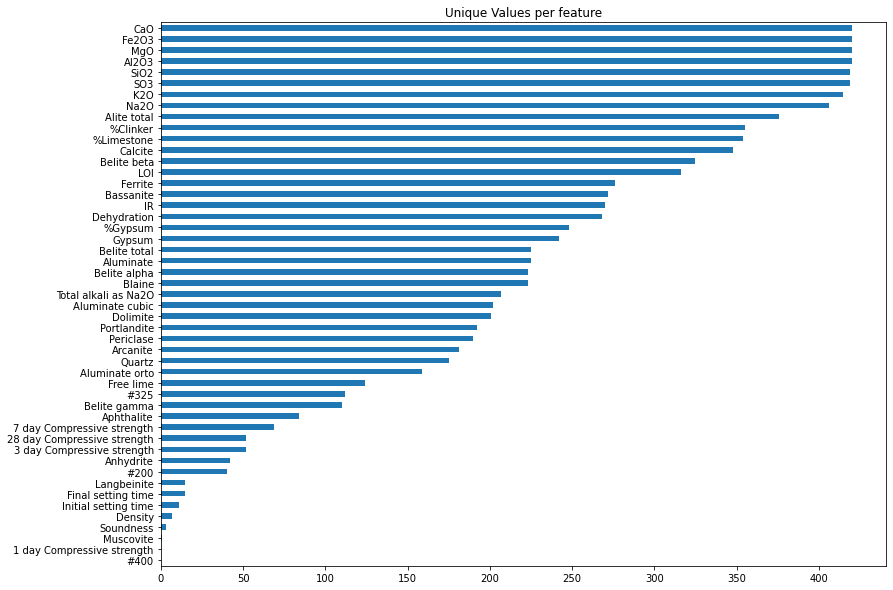

<IPython.core.display.Javascript object>

In [15]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TiO2'),
  Text(1, 0, 'Ca(OH)2'),
  Text(2, 0, 'CaCO3'),
  Text(3, 0, 'Remarks'),
  Text(4, 0, 'Date')])

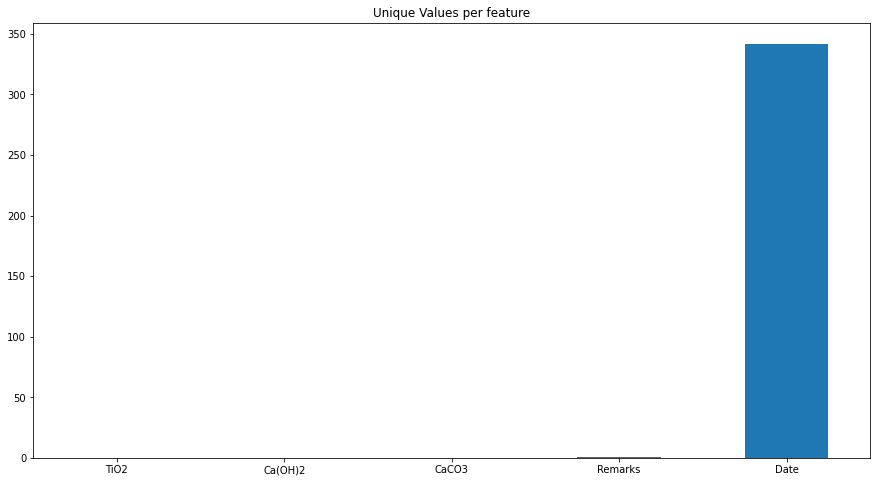

<IPython.core.display.Javascript object>

In [16]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [17]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 52 variables with missing values from a total of 54


<IPython.core.display.Javascript object>

In [18]:
df.isna().any()

Date                           False
CaO                             True
MgO                             True
Na2O                            True
Al2O3                           True
SiO2                            True
SO3                             True
K2O                             True
TiO2                            True
Fe2O3                           True
Ca(OH)2                         True
CaCO3                           True
Total alkali as Na2O            True
Soundness                       True
LOI                             True
IR                              True
Alite total                     True
Belite total                    True
Belite alpha                    True
Belite beta                     True
Belite gamma                    True
Ferrite                         True
Aluminate                       True
Aluminate cubic                 True
Aluminate orto                  True
Free lime                       True
Portlandite                     True
P

<IPython.core.display.Javascript object>

In [19]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

,Missing (count)
#400,421
TiO2,421
Ca(OH)2,421
CaCO3,421
1 day Compressive strength,421
Langbeinite,289
Belite total,152
Dehydration,151
Total alkali as Na2O,121
Soundness,33


<IPython.core.display.Javascript object>

In [20]:
print("There are a total of ", df.isna().sum().sum(), "missing values.")

There are a total of  3129 missing values.


<IPython.core.display.Javascript object>

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of quantity of missing values')

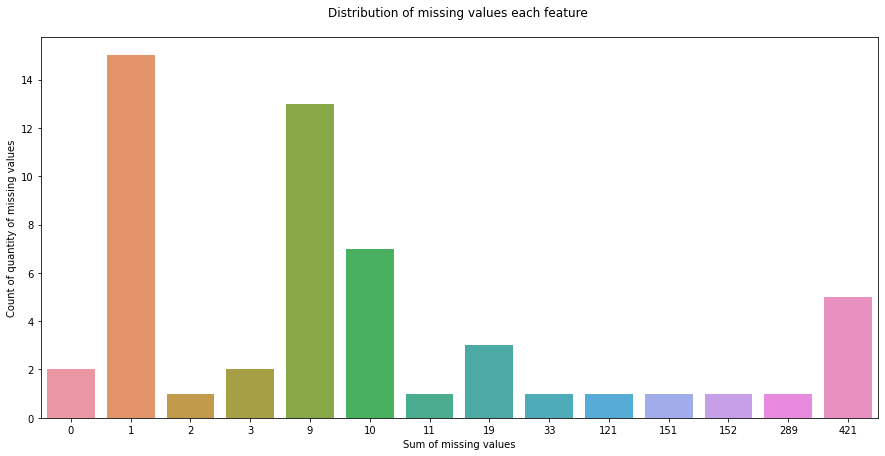

<IPython.core.display.Javascript object>

In [21]:
plt.figure(figsize=(15, 7))
sns.countplot(df.isna().sum())
plt.title("Distribution of missing values each feature \n")
plt.xlabel("Sum of missing values")
plt.ylabel("Count of quantity of missing values")

<BarContainer object of 54 artists>

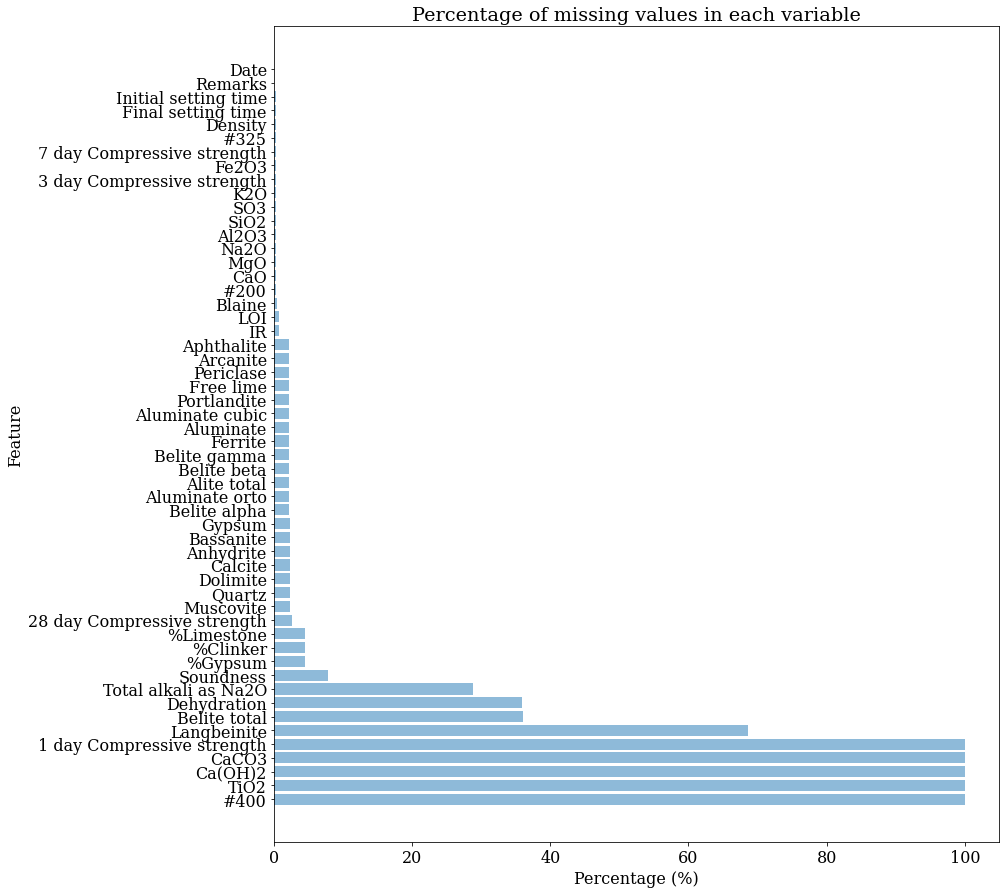

<IPython.core.display.Javascript object>

In [22]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [23]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
#400,100.000000
TiO2,100.000000
Ca(OH)2,100.000000
CaCO3,100.000000
1 day Compressive strength,100.000000
Langbeinite,68.646081
Belite total,36.104513
Dehydration,35.866983
Total alkali as Na2O,28.741093
Soundness,7.838480


<IPython.core.display.Javascript object>

In [24]:
df_copy = df.copy().select_dtypes(exclude=object)
df_copy["Remarks"] = df["Remarks"].values.copy()

df_grouped = df_copy.groupby(["Remarks", "Date"]).mean()

# If we just count the daily mean by cement type, how does the missing be afterwards

(df_grouped.isna().sum() / df_grouped.shape[0] * 100).sort_values(
    ascending=False
).to_frame(name="Missing (%)").style.background_gradient(cmap="Reds")

,Missing (%)
#400,100.000000
1 day Compressive strength,100.000000
Langbeinite,71.052632
Dehydration,33.040936
Belite total,28.362573
Total alkali as Na2O,24.561404
Soundness,6.725146
%Gypsum,2.923977
%Clinker,2.923977
%Limestone,2.923977


<IPython.core.display.Javascript object>

<BarContainer object of 54 artists>

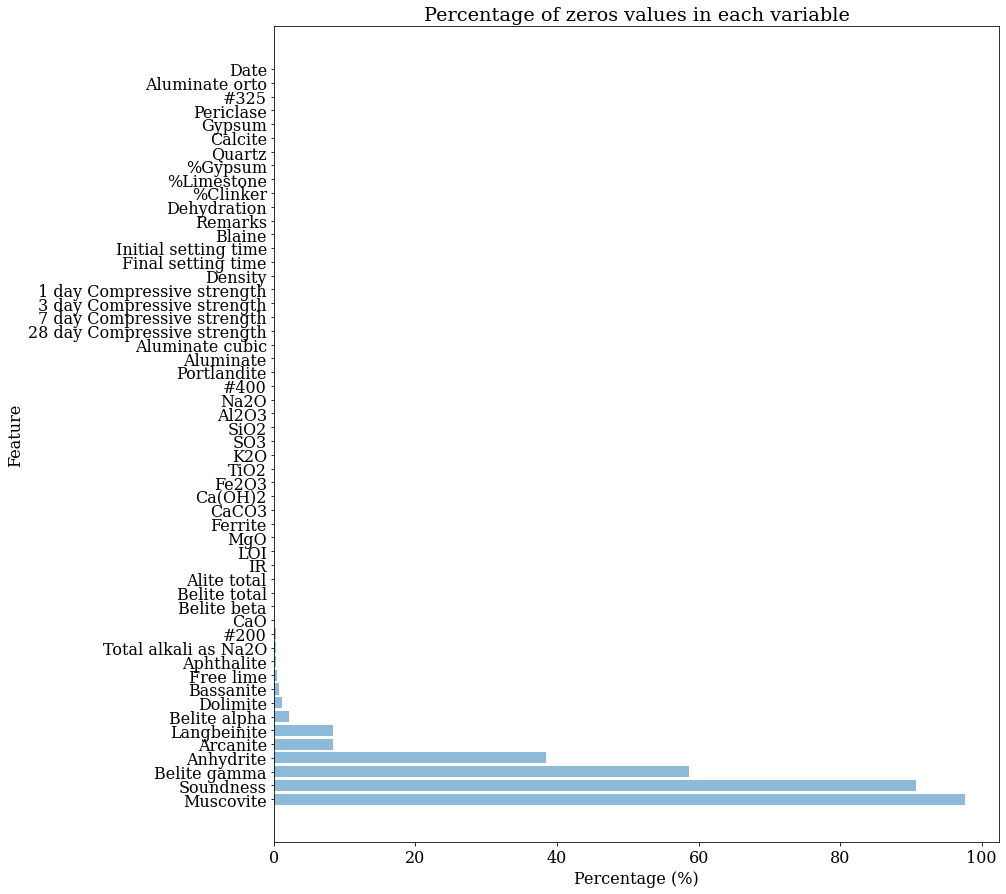

<IPython.core.display.Javascript object>

In [25]:
zeros_perc = (df == 0).sum(axis=0) / df.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of zeros values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

<h3>2.4. Duplicates</h3>

In [26]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

In [27]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

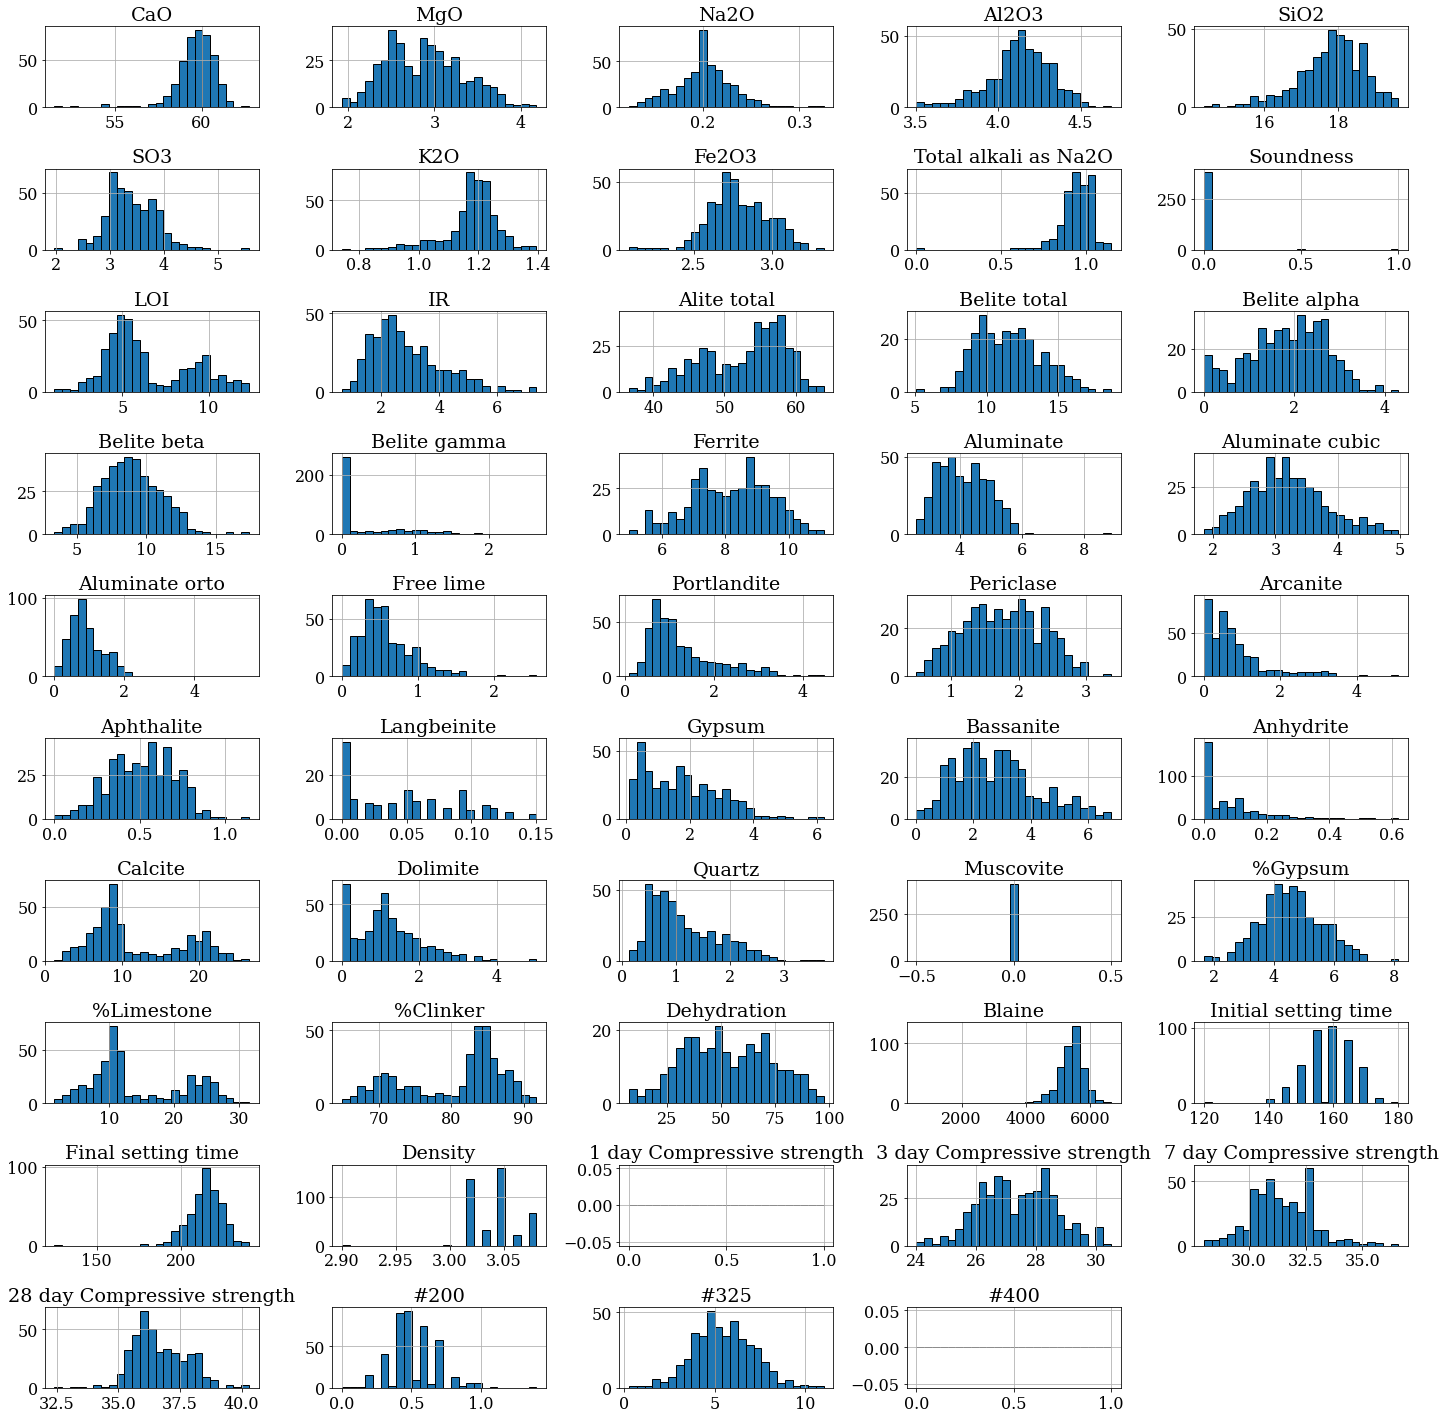

<IPython.core.display.Javascript object>

In [28]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

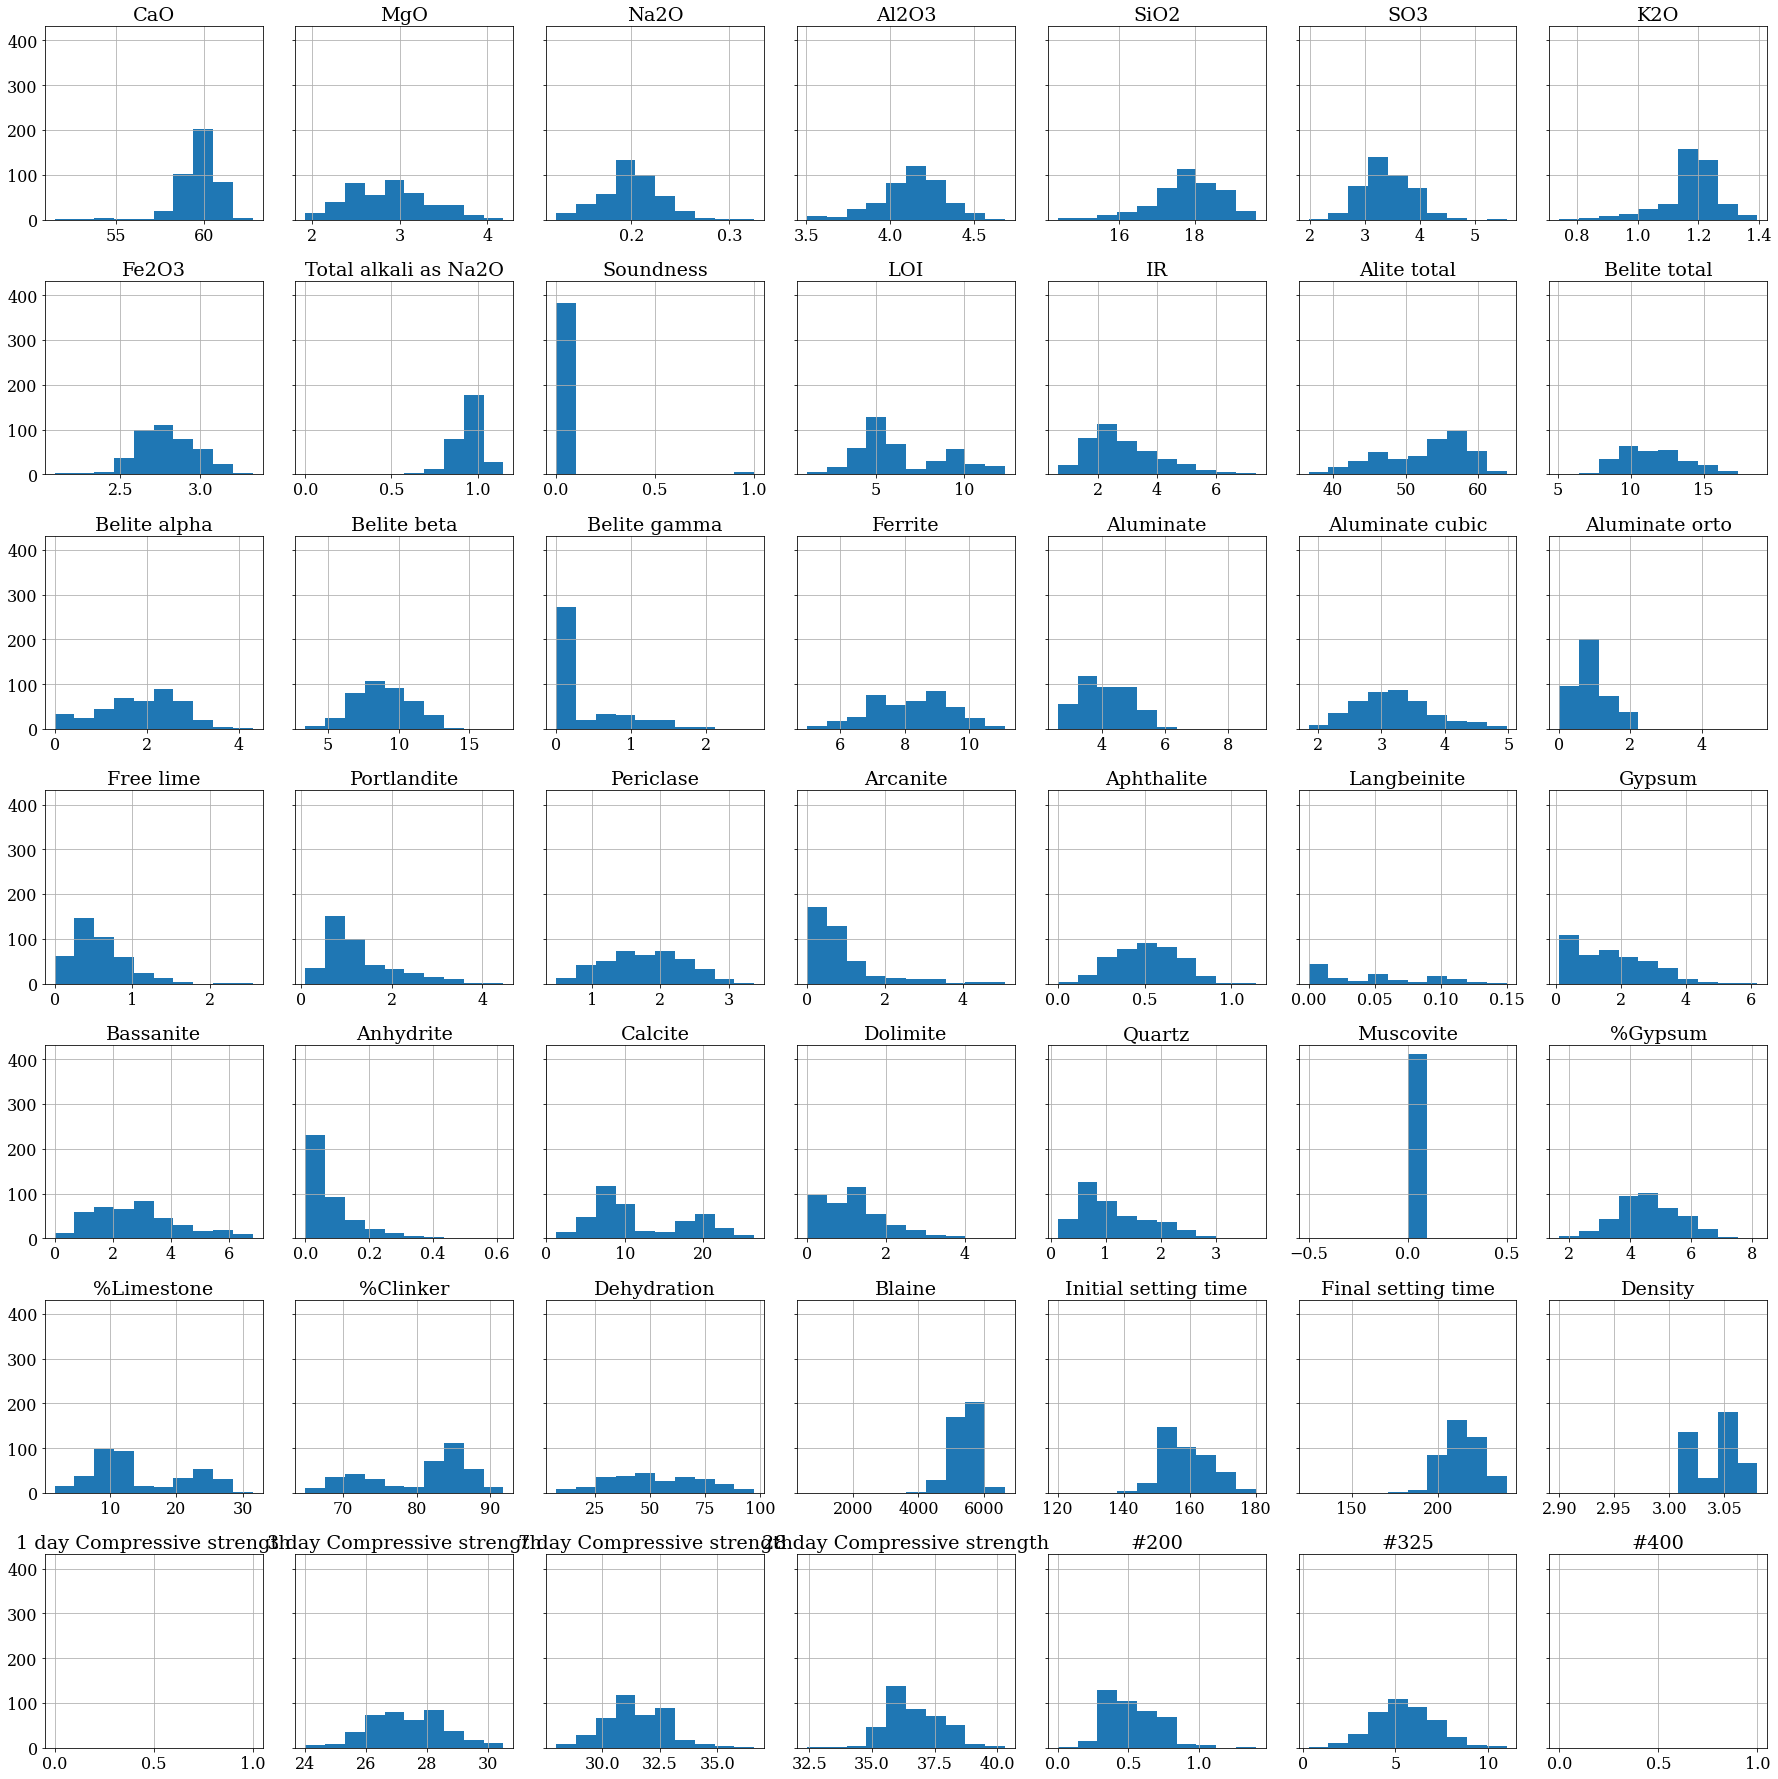

<IPython.core.display.Javascript object>

In [29]:
df.select_dtypes(include="float64").hist(figsize=(25, 25), sharey=True)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


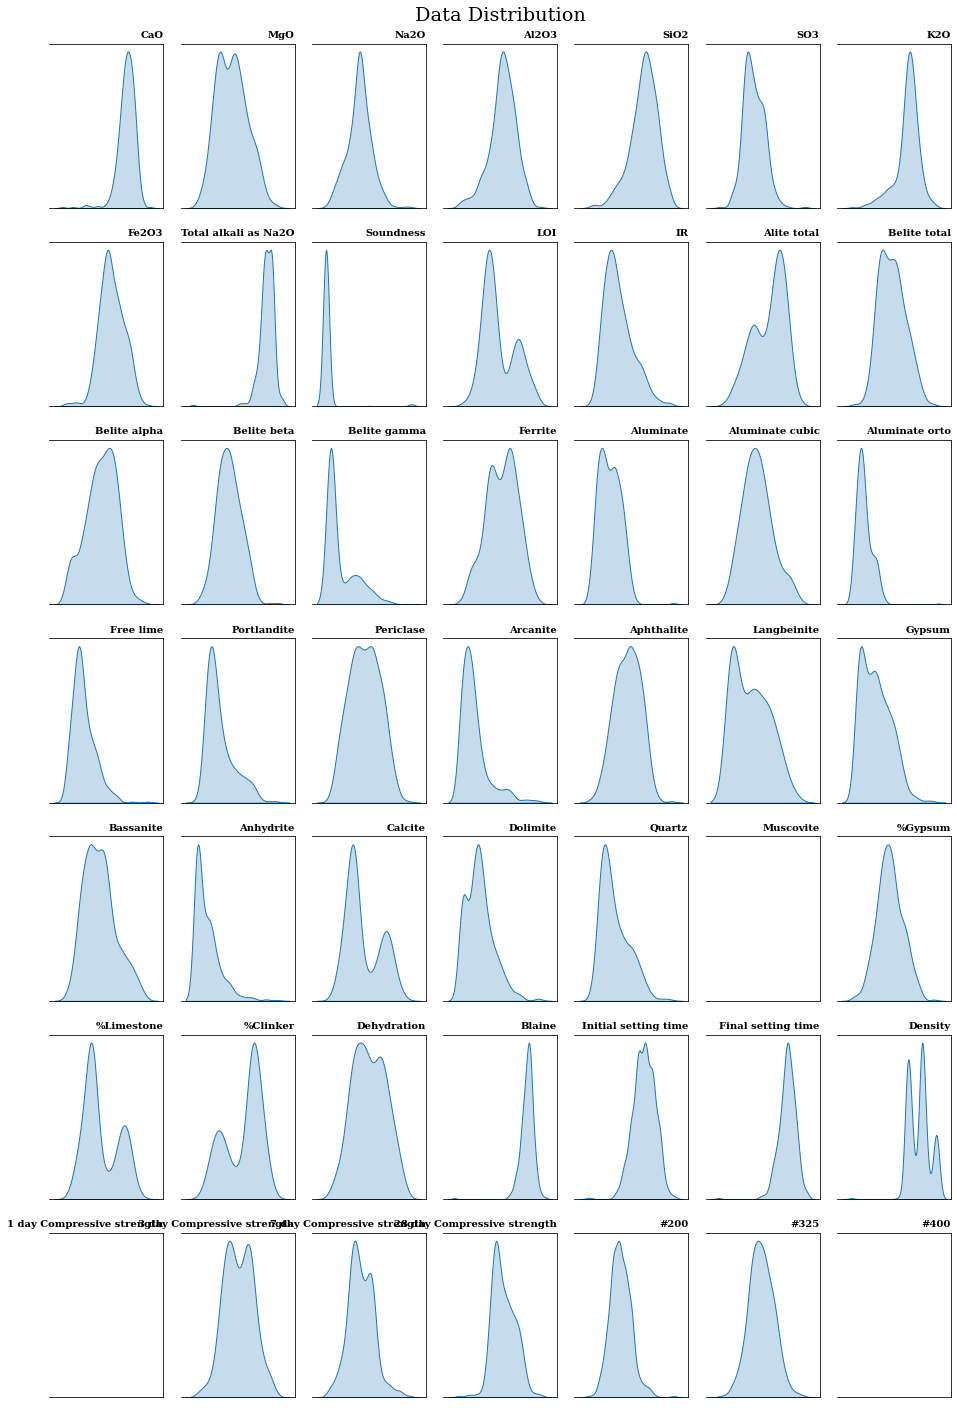

<IPython.core.display.Javascript object>

In [30]:
fig, axes = plt.subplots(7, 7, figsize=(13, 20))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

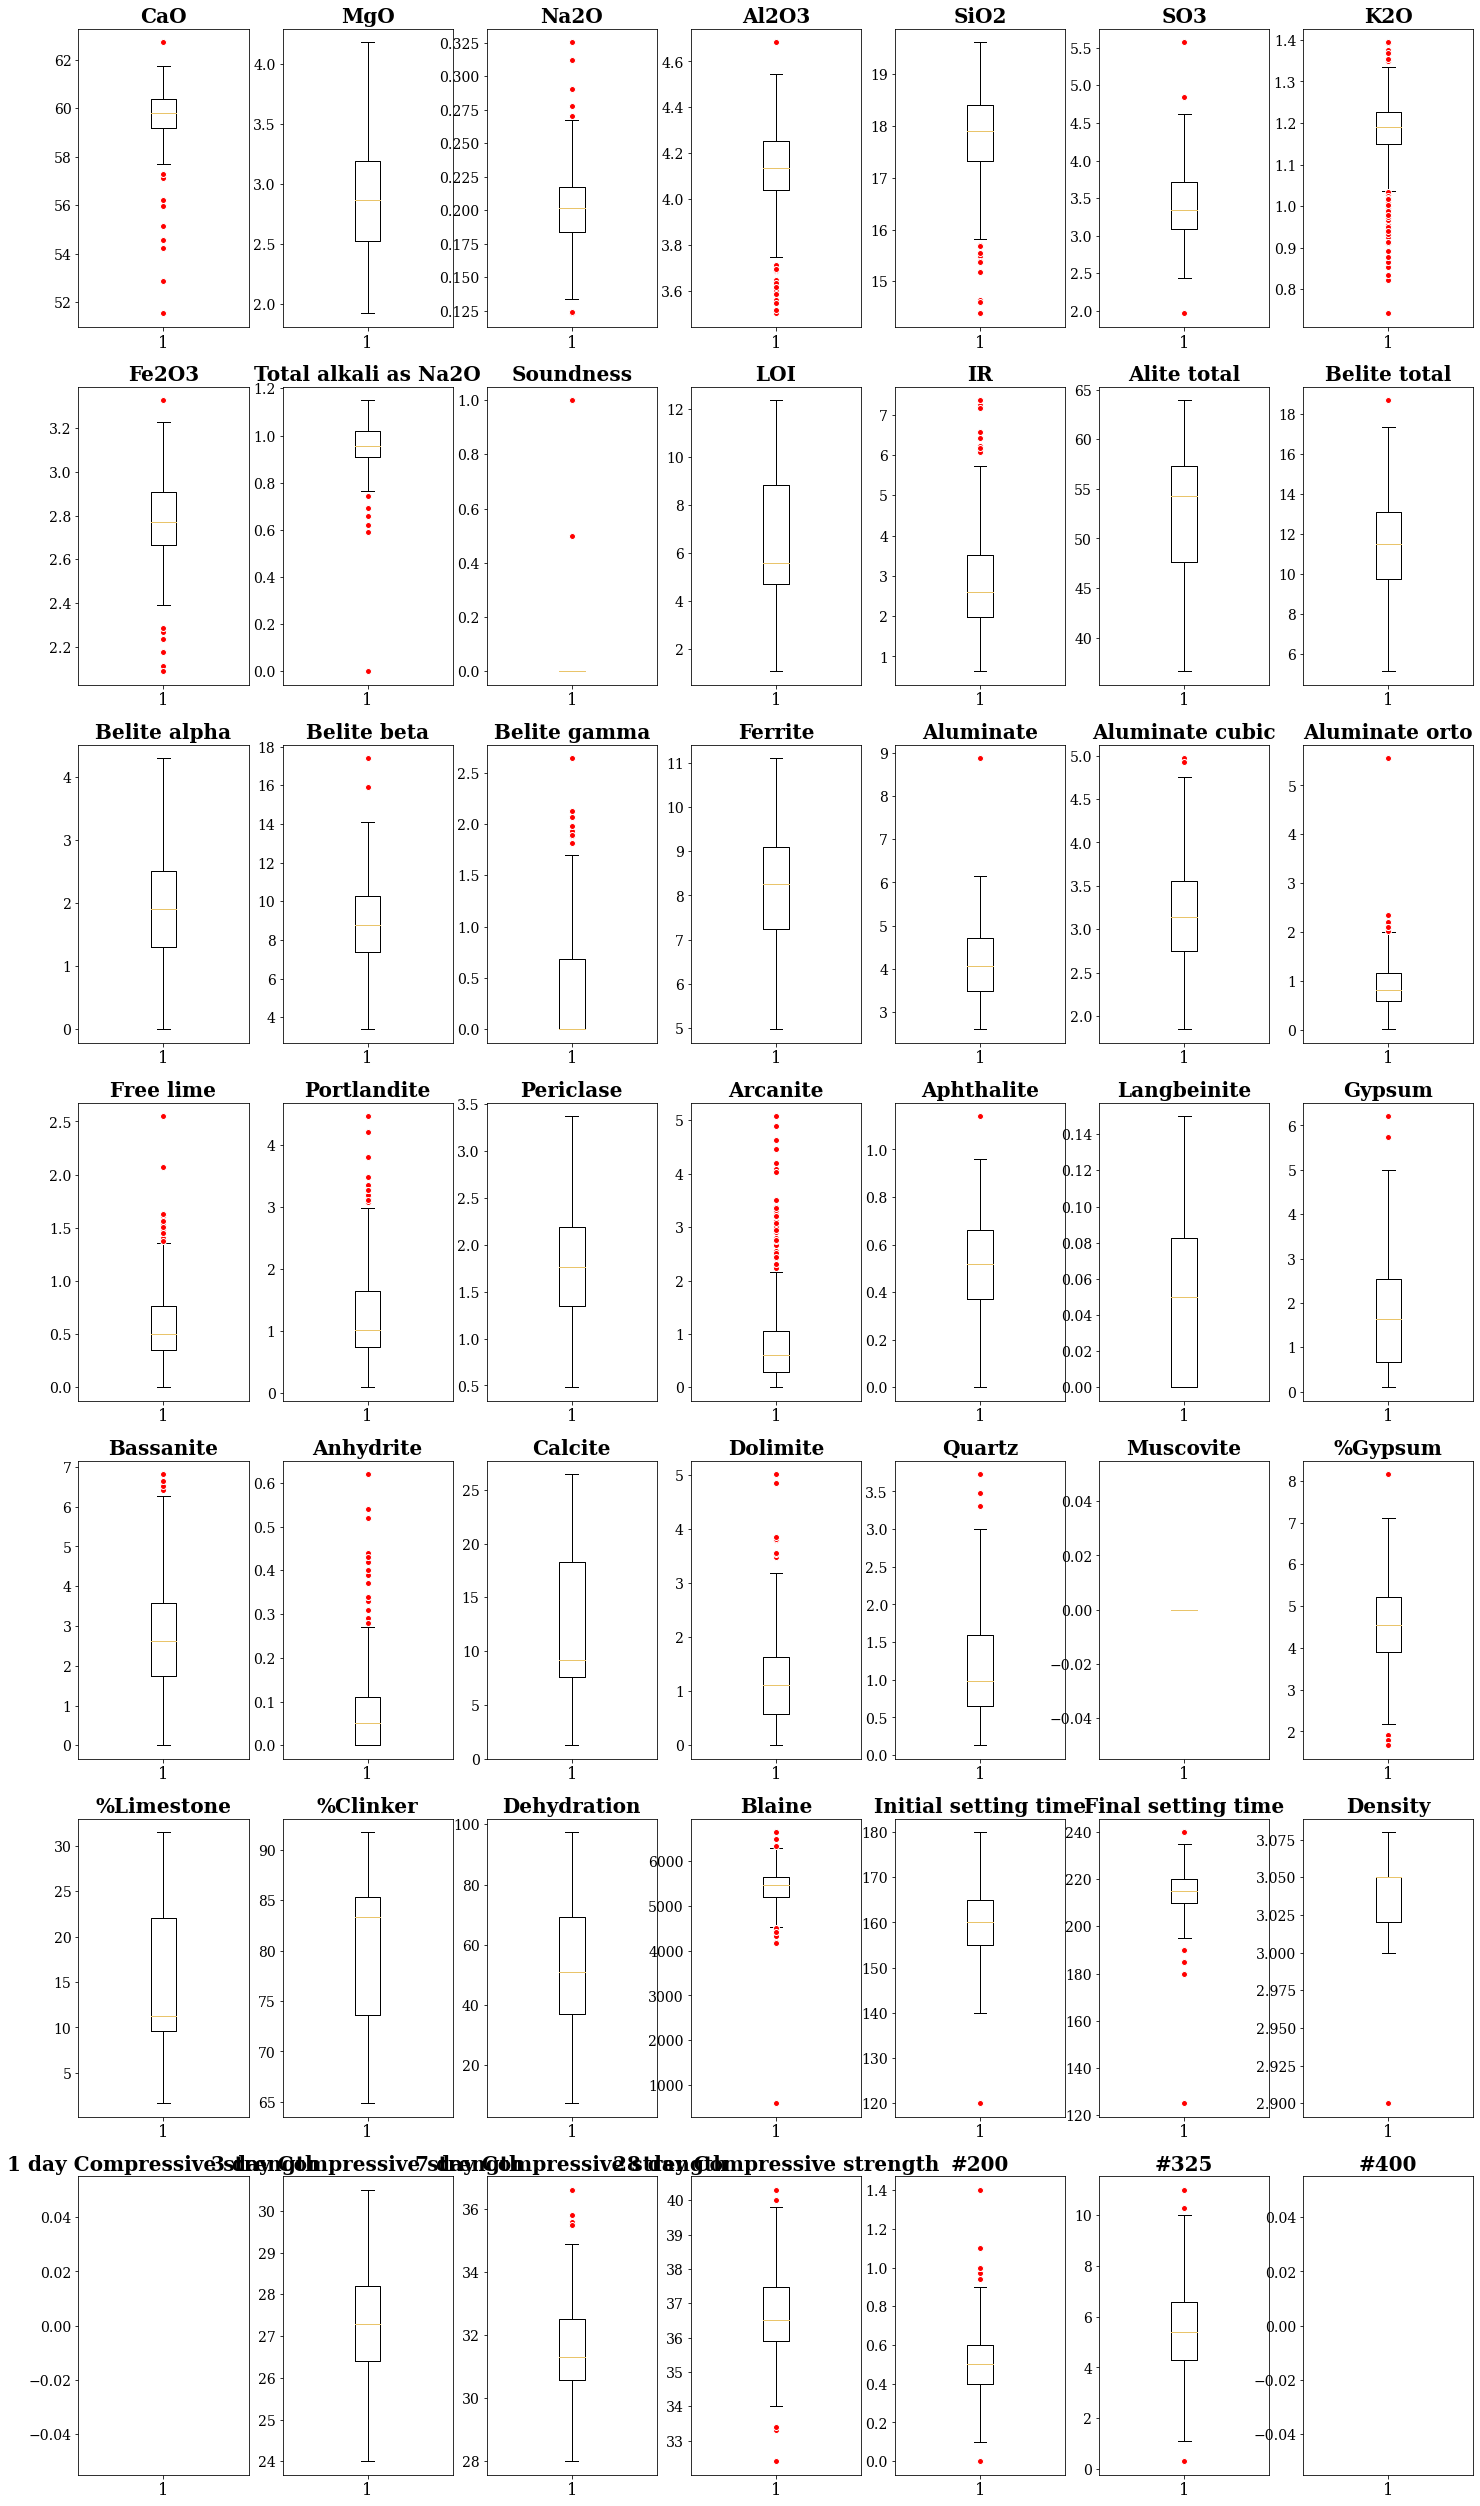

<IPython.core.display.Javascript object>

In [31]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(7, 7, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

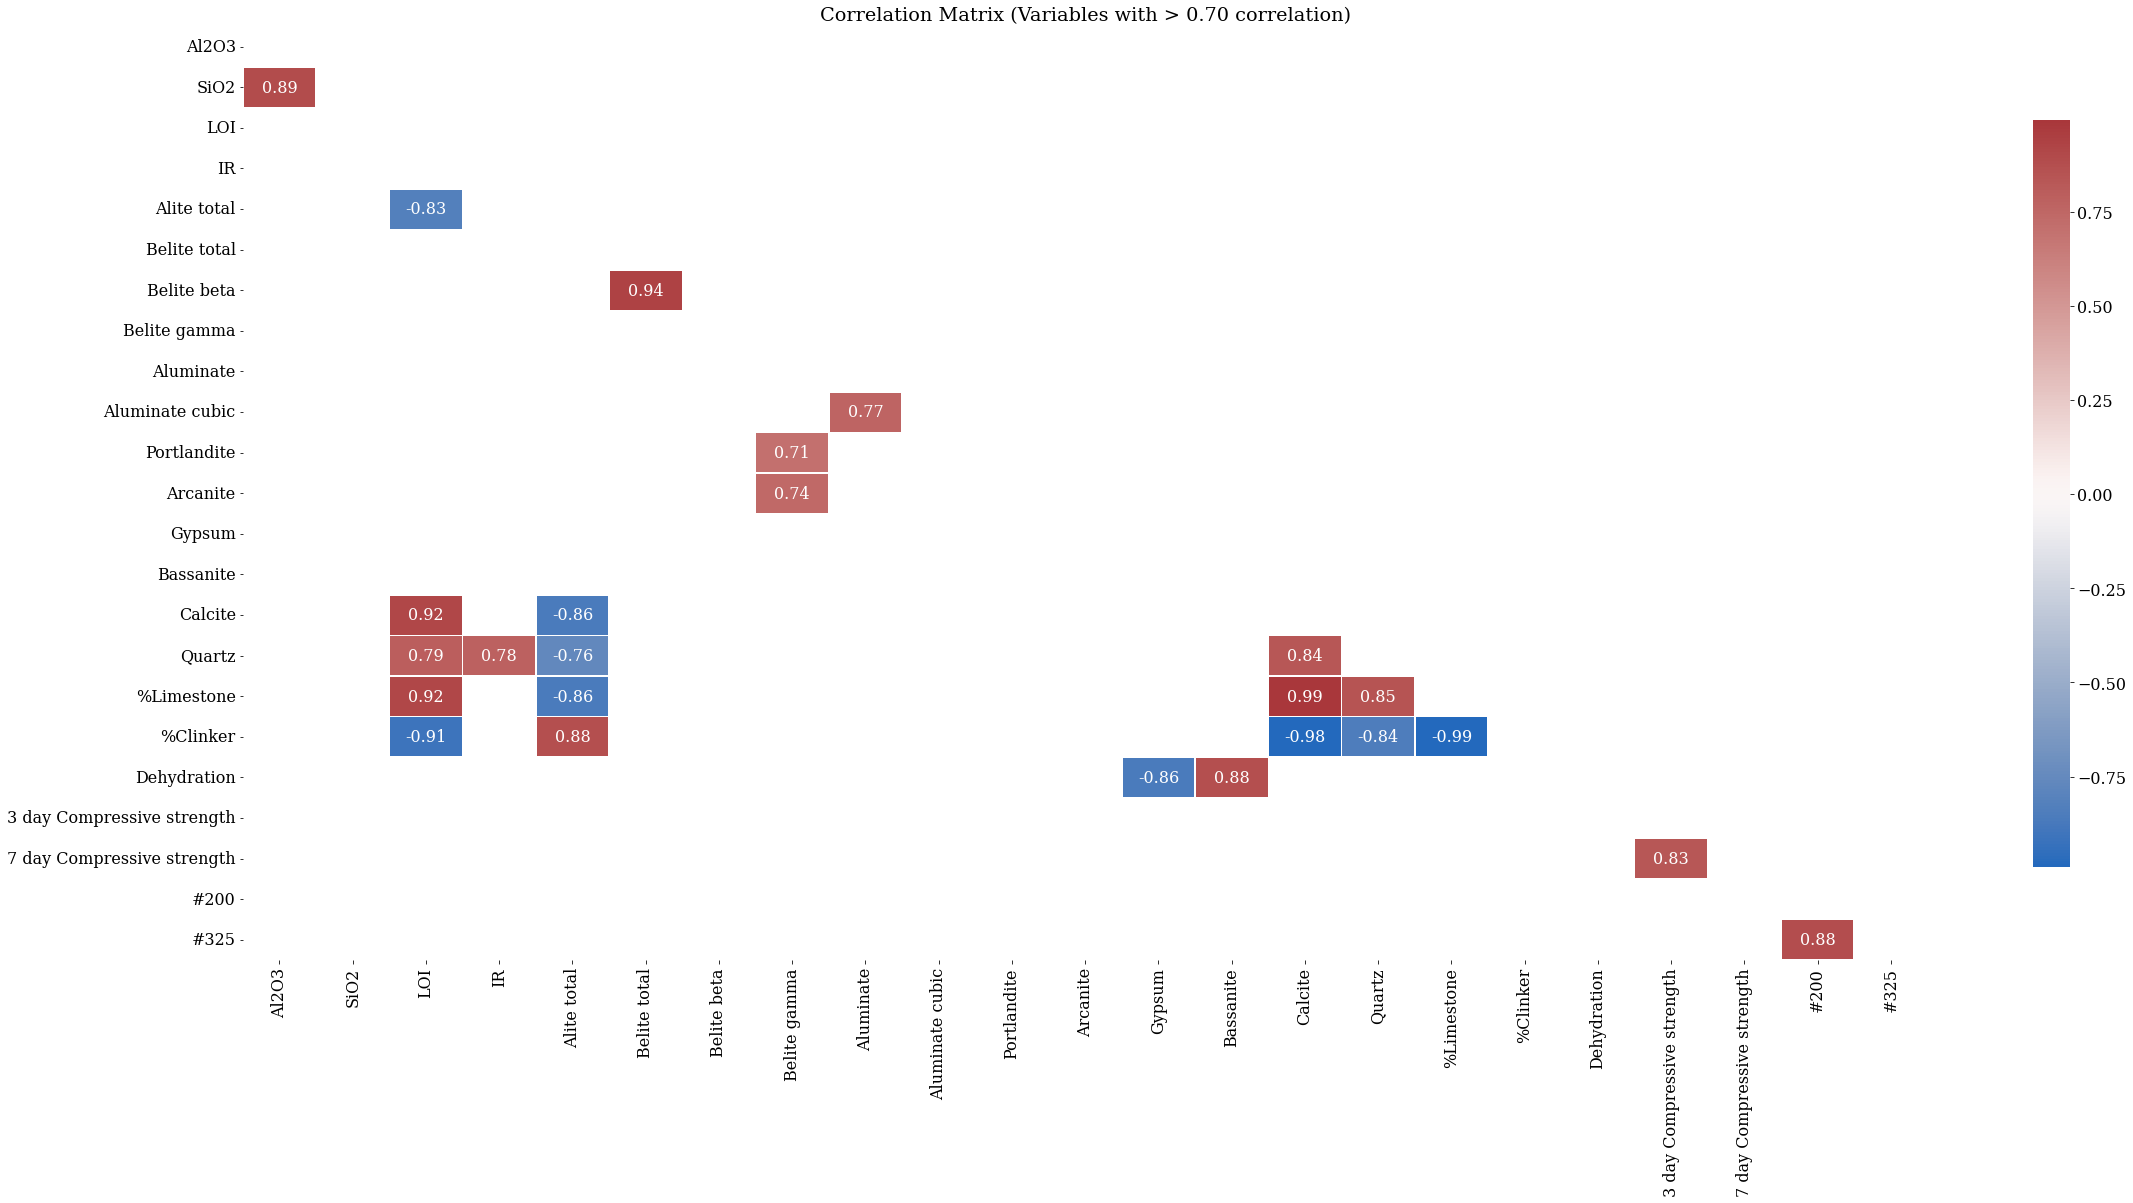

<IPython.core.display.Javascript object>

In [32]:
df_corr = df.corr(method="pearson")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [33]:
corr_matrix = df.corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Calcite                     %Limestone                    0.993816
%Limestone                  %Clinker                      0.989328
Calcite                     %Clinker                      0.982553
Belite total                Belite beta                   0.937982
LOI                         Calcite                       0.915957
                            %Limestone                    0.915509
                            %Clinker                      0.909772
Al2O3                       SiO2                          0.888733
#200                        #325                          0.882097
Alite total                 %Clinker                      0.877268
Bassanite                   Dehydration                   0.876200
Gypsum                      Dehydration                   0.860458
Alite total                 Calcite                       0.858241
                            %Limestone                    0.858061
Quartz                      %Limestone                    0.85

<IPython.core.display.Javascript object>

In [34]:
sol[sol.index.map(lambda x: "28 day Compressive strength" in x)]

7 day Compressive strength   28 day Compressive strength    0.657737
3 day Compressive strength   28 day Compressive strength    0.621273
MgO                          28 day Compressive strength    0.429774
Fe2O3                        28 day Compressive strength    0.425029
K2O                          28 day Compressive strength    0.365753
SO3                          28 day Compressive strength    0.285482
Belite alpha                 28 day Compressive strength    0.254378
Total alkali as Na2O         28 day Compressive strength    0.219667
%Gypsum                      28 day Compressive strength    0.210820
Langbeinite                  28 day Compressive strength    0.185881
Initial setting time         28 day Compressive strength    0.184469
Quartz                       28 day Compressive strength    0.178465
Bassanite                    28 day Compressive strength    0.149233
Belite total                 28 day Compressive strength    0.147902
Final setting time           28 da

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

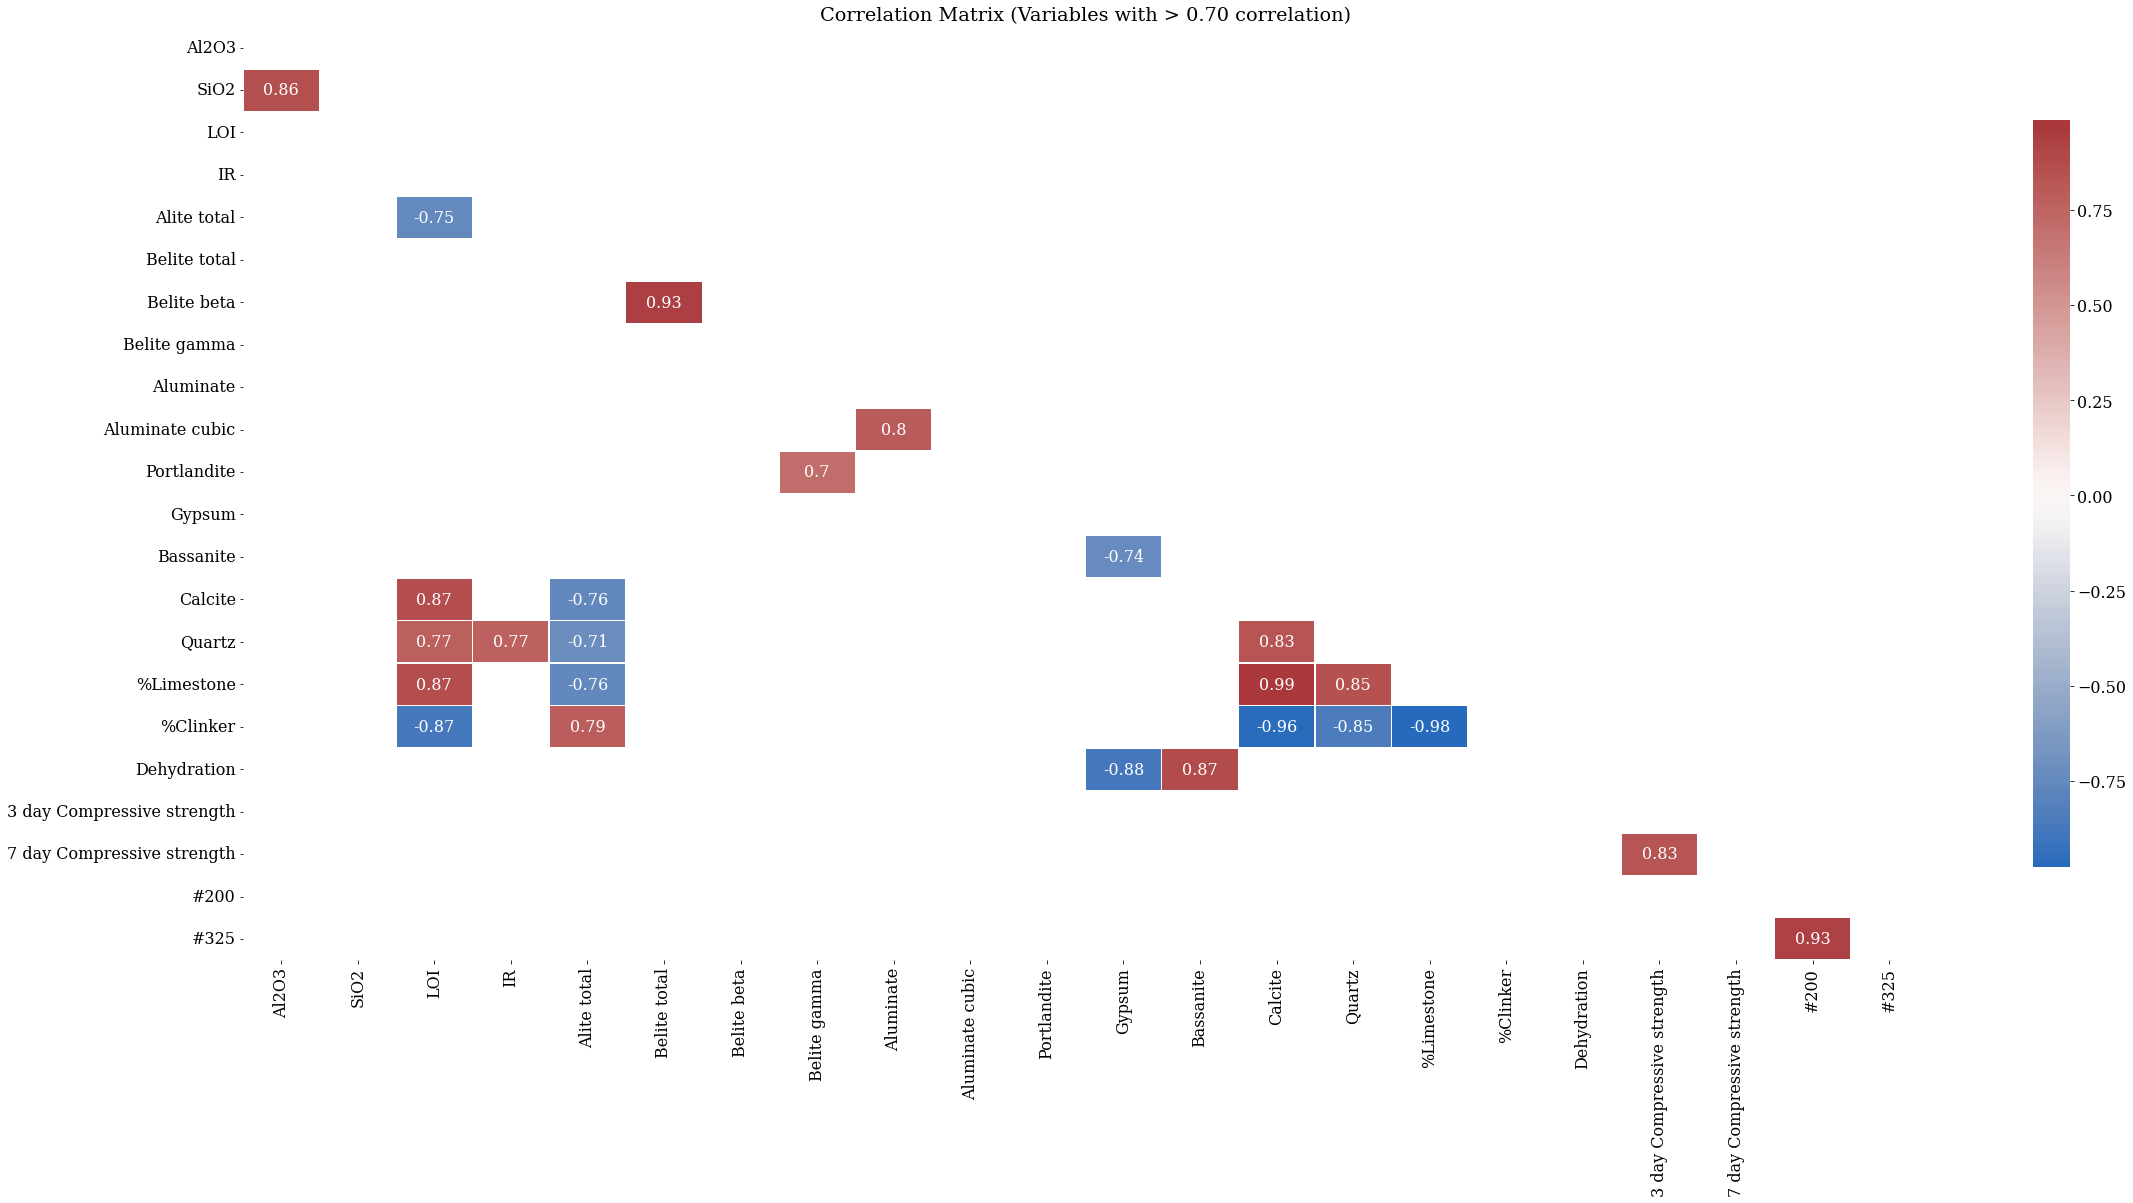

<IPython.core.display.Javascript object>

In [35]:
df_corr = df.corr(method="spearman")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [36]:
corr_matrix = df.corr(method="spearman").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Calcite                     %Limestone                    0.986617
%Limestone                  %Clinker                      0.975550
Calcite                     %Clinker                      0.963771
Belite total                Belite beta                   0.934991
#200                        #325                          0.926271
Gypsum                      Dehydration                   0.883230
Bassanite                   Dehydration                   0.874706
LOI                         %Clinker                      0.872795
                            %Limestone                    0.870116
                            Calcite                       0.869917
Al2O3                       SiO2                          0.862482
Quartz                      %Limestone                    0.852805
                            %Clinker                      0.848063
Calcite                     Quartz                        0.831527
3 day Compressive strength  7 day Compressive strength    0.83

<IPython.core.display.Javascript object>

In [37]:
sol[sol.index.map(lambda x: "28 day Compressive strength" in x)]

7 day Compressive strength   28 day Compressive strength    0.627312
3 day Compressive strength   28 day Compressive strength    0.608121
MgO                          28 day Compressive strength    0.488797
Fe2O3                        28 day Compressive strength    0.460108
K2O                          28 day Compressive strength    0.377957
SO3                          28 day Compressive strength    0.301101
Total alkali as Na2O         28 day Compressive strength    0.285553
Quartz                       28 day Compressive strength    0.272414
Belite alpha                 28 day Compressive strength    0.264197
%Gypsum                      28 day Compressive strength    0.238608
Calcite                      28 day Compressive strength    0.235038
%Limestone                   28 day Compressive strength    0.225744
Langbeinite                  28 day Compressive strength    0.216557
LOI                          28 day Compressive strength    0.210636
IR                           28 da

<IPython.core.display.Javascript object>

<h4>3.3.3 Kendall</h4>

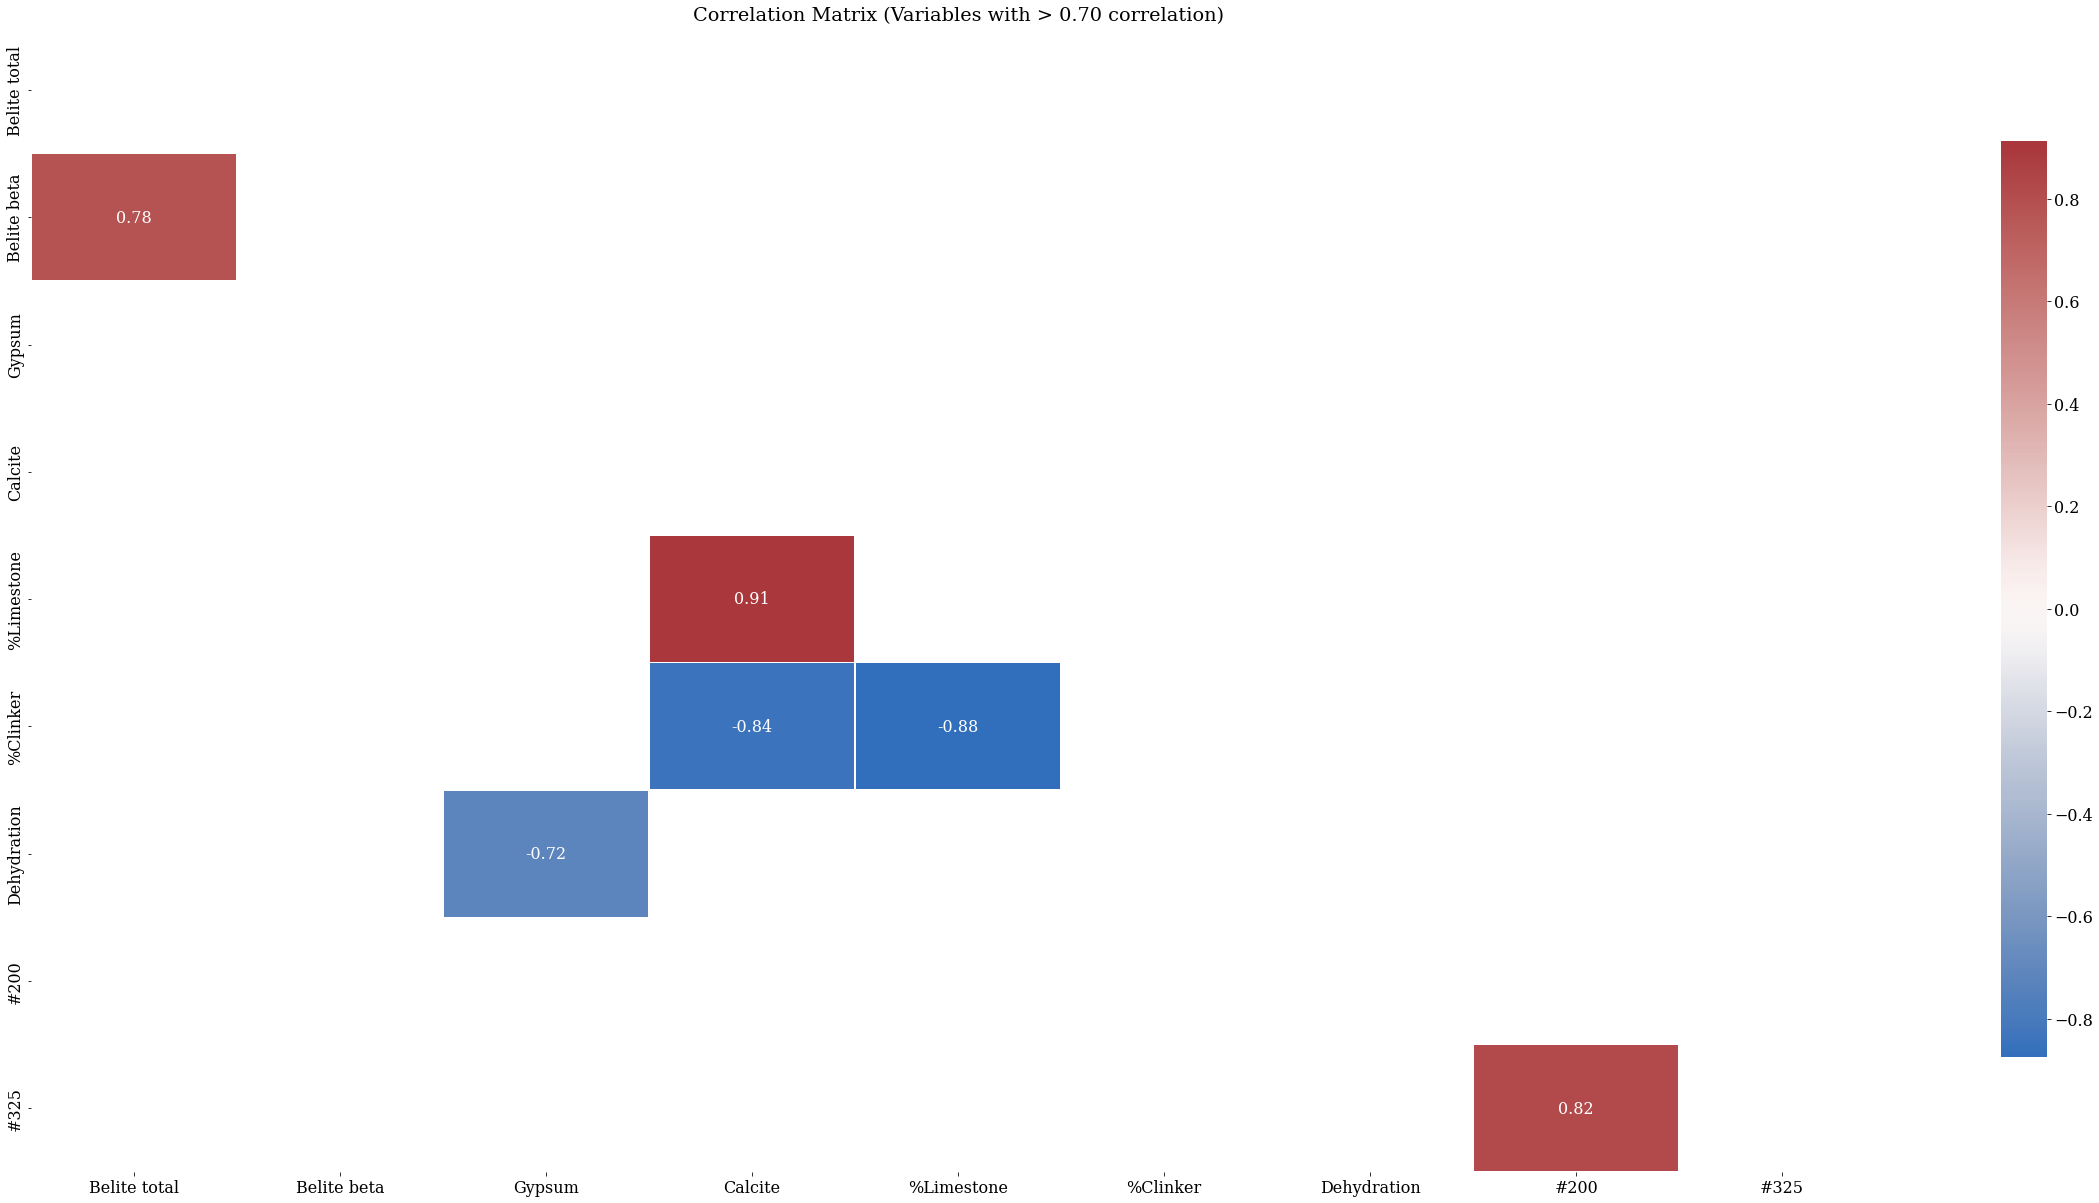

<IPython.core.display.Javascript object>

In [38]:
df_corr = df.corr(method="kendall")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [39]:
corr_matrix = df.corr(method="kendall").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Calcite       %Limestone     0.912548
%Limestone    %Clinker       0.875501
Calcite       %Clinker       0.841966
#200          #325           0.821194
Belite total  Belite beta    0.780106
Gypsum        Dehydration    0.718594
dtype: float64

<IPython.core.display.Javascript object>

In [40]:
sol[sol.index.map(lambda x: "28 day Compressive strength" in x)]

7 day Compressive strength   28 day Compressive strength    0.464575
3 day Compressive strength   28 day Compressive strength    0.450698
MgO                          28 day Compressive strength    0.333987
Fe2O3                        28 day Compressive strength    0.320203
K2O                          28 day Compressive strength    0.250573
SO3                          28 day Compressive strength    0.207167
Total alkali as Na2O         28 day Compressive strength    0.195188
Quartz                       28 day Compressive strength    0.182087
Belite alpha                 28 day Compressive strength    0.179874
%Gypsum                      28 day Compressive strength    0.163737
Calcite                      28 day Compressive strength    0.154578
Langbeinite                  28 day Compressive strength    0.150640
%Limestone                   28 day Compressive strength    0.148932
LOI                          28 day Compressive strength    0.140864
IR                           28 da

<IPython.core.display.Javascript object>

#### Bivariate Analysis

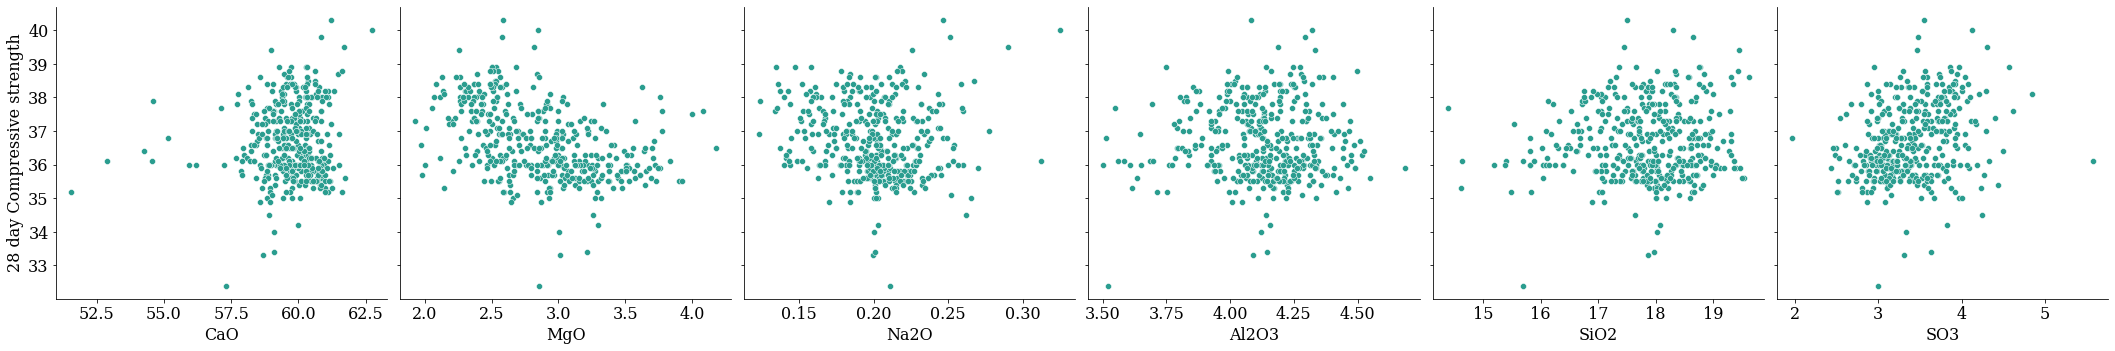

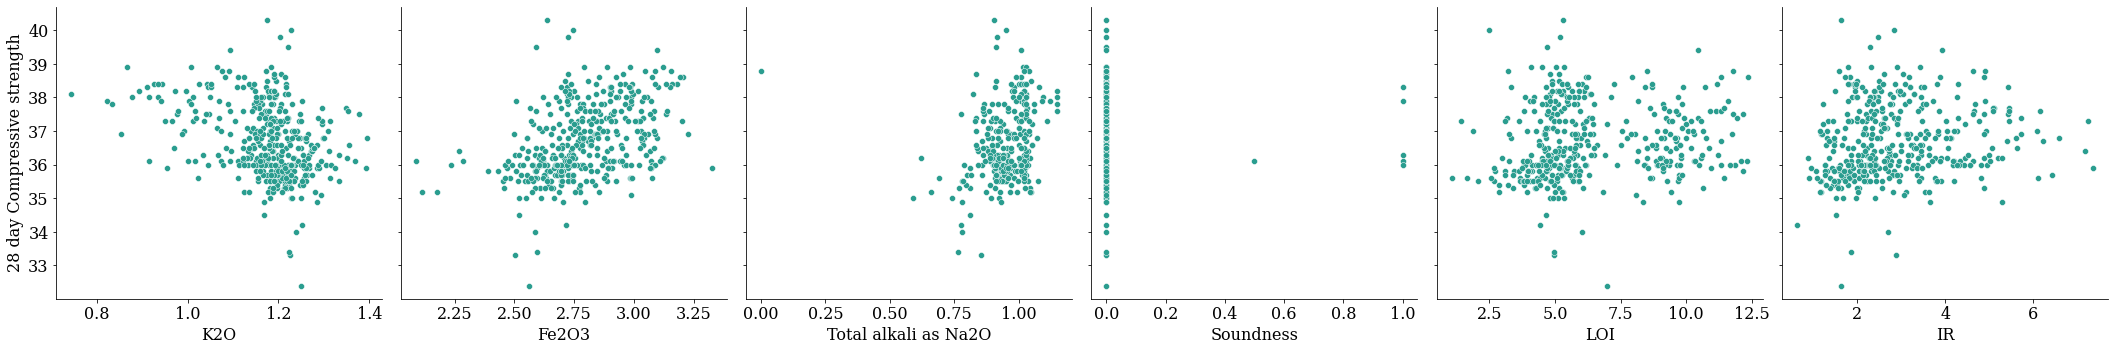

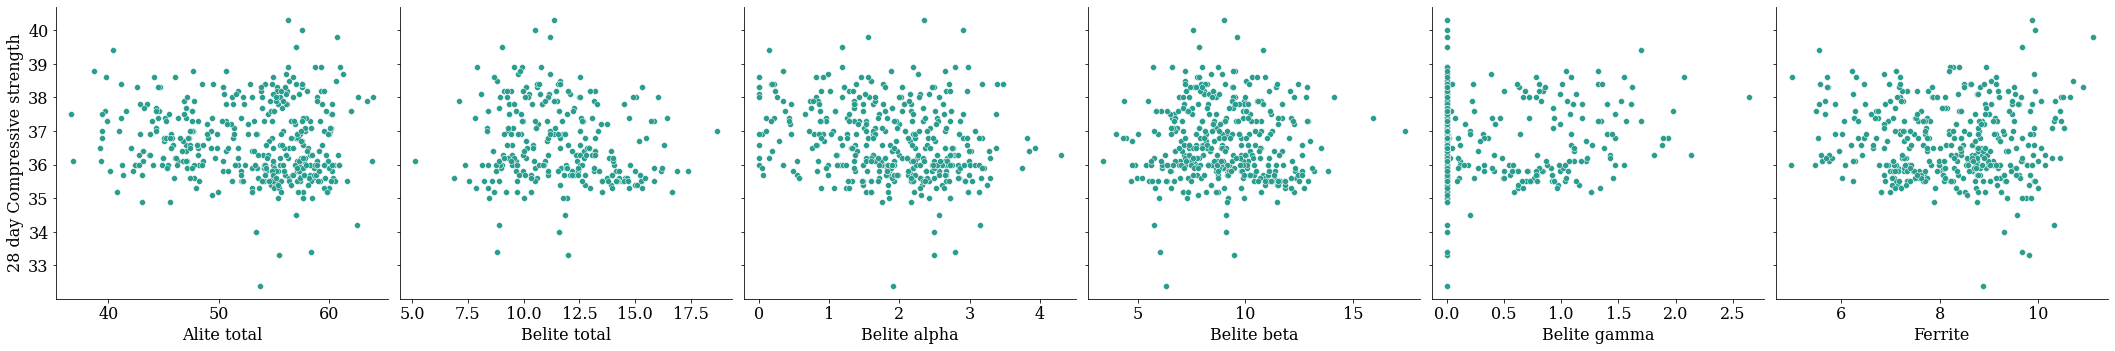

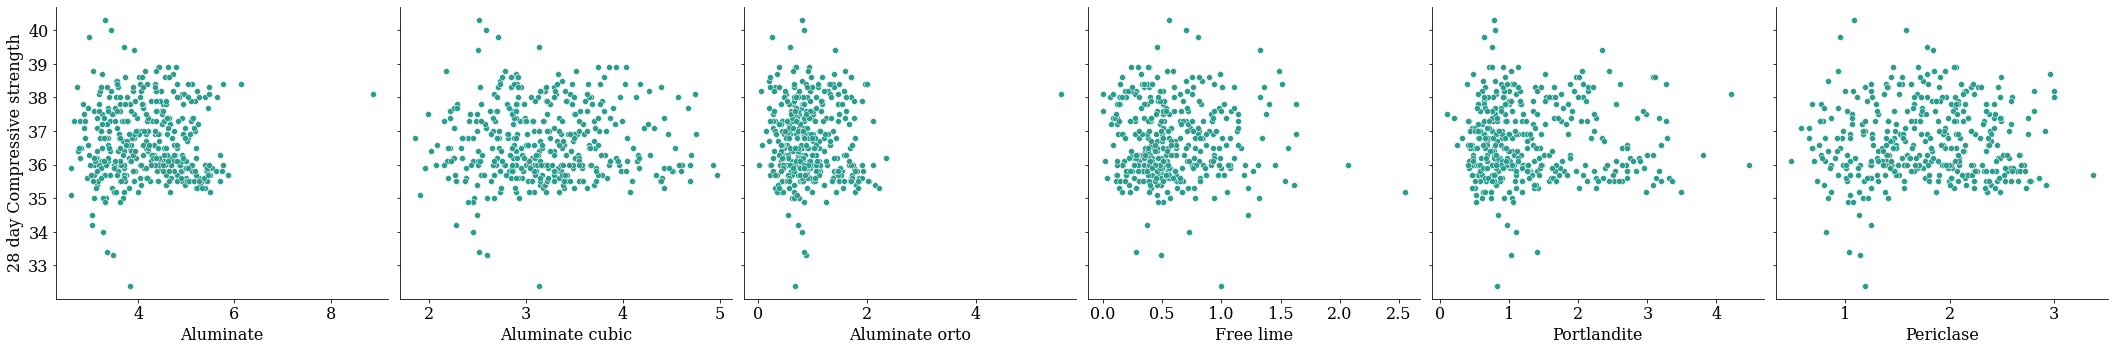

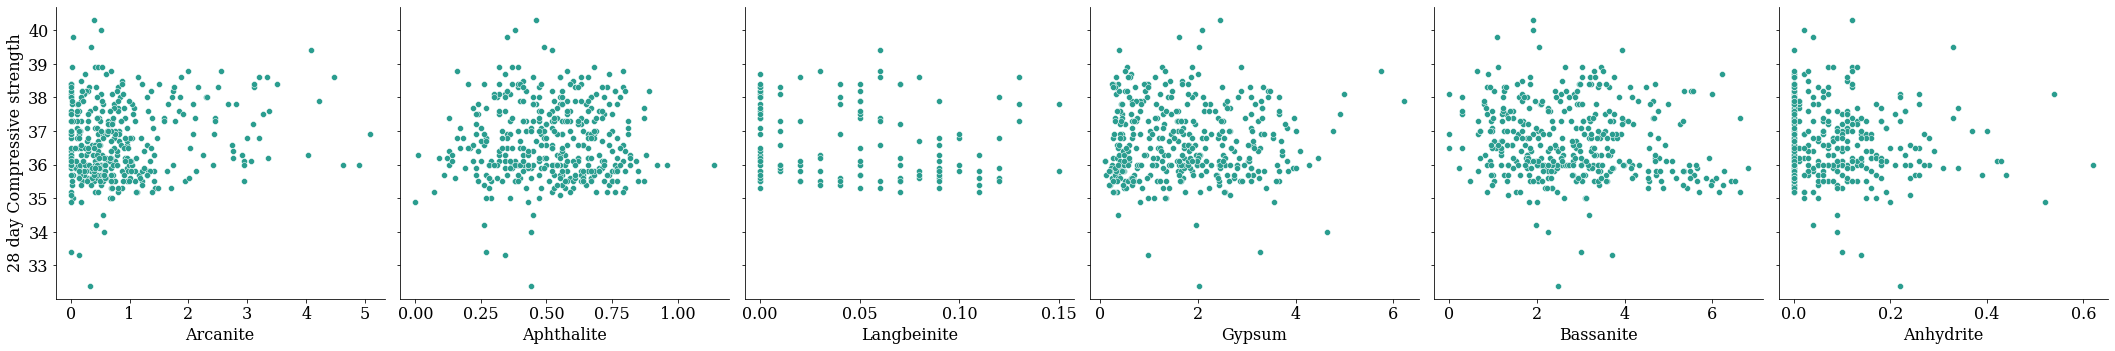

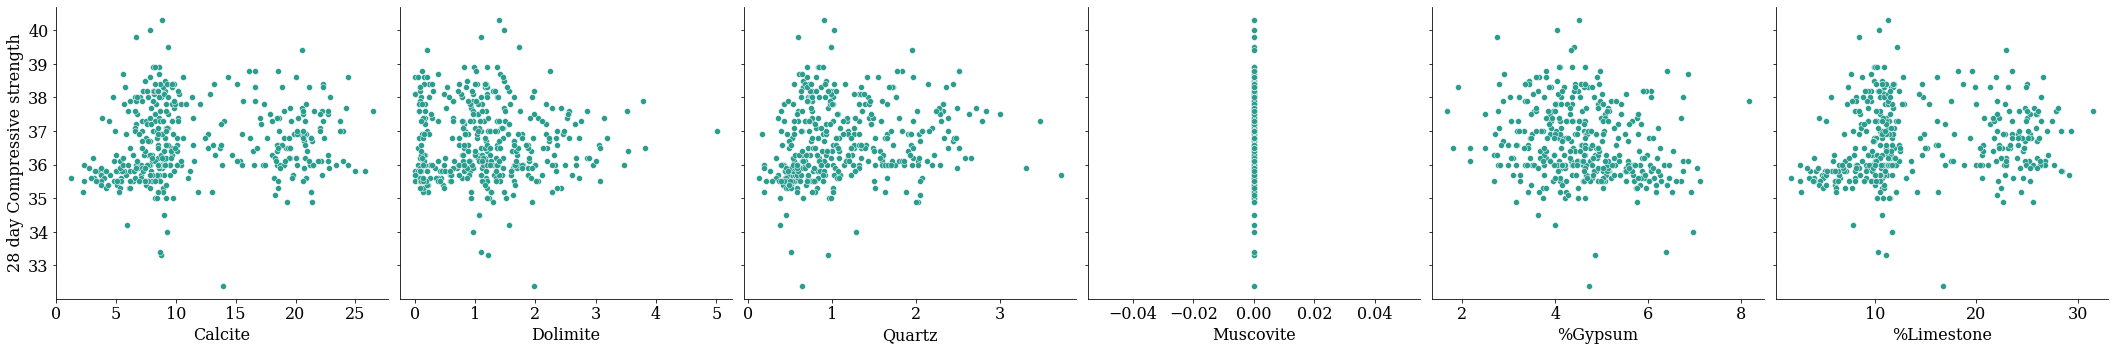

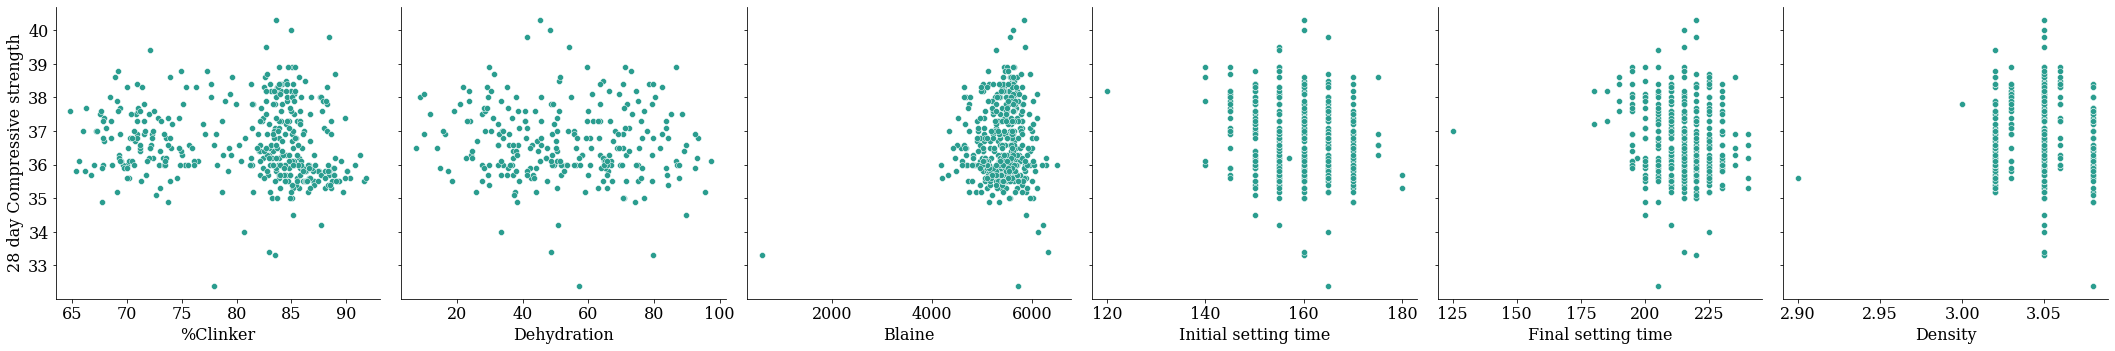

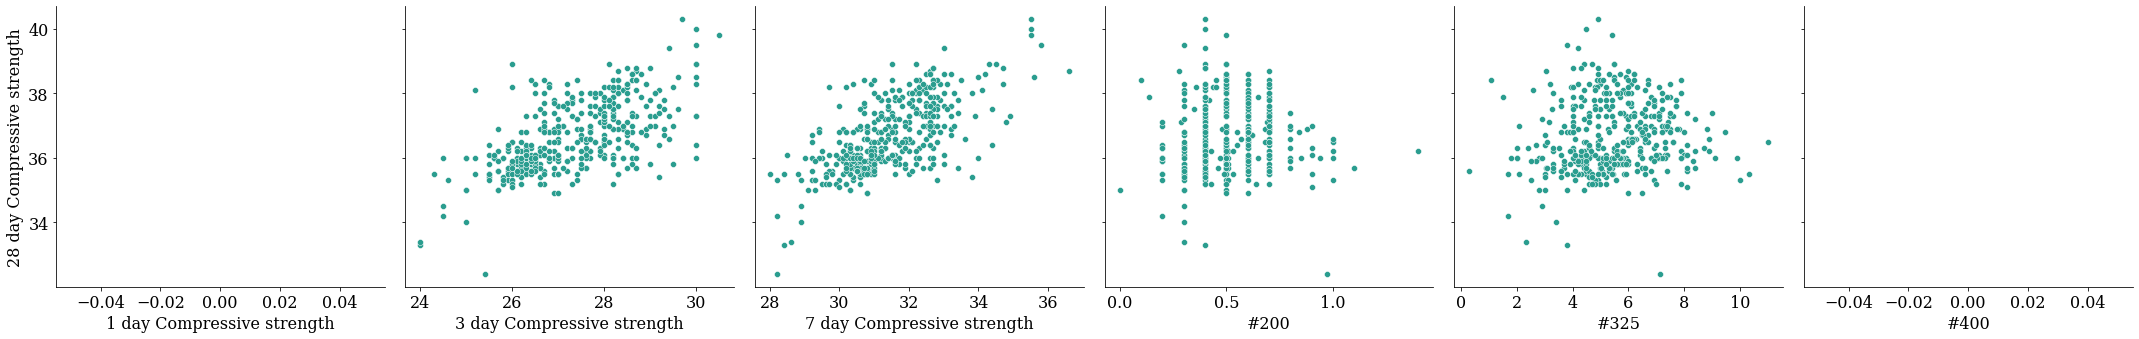

<IPython.core.display.Javascript object>

In [41]:
num_lines = 8
plots_per_line = 6

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("28 day Compressive strength")
variables_to_plot.remove("Date")

num_lines = 8
plots_per_line = 6

for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["28 day Compressive strength"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

plt.tight_layout()
plt.show()

In [42]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

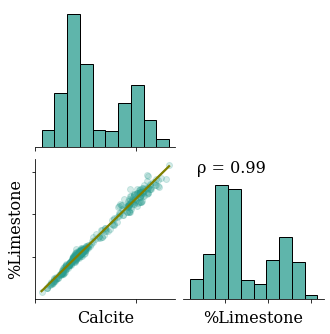

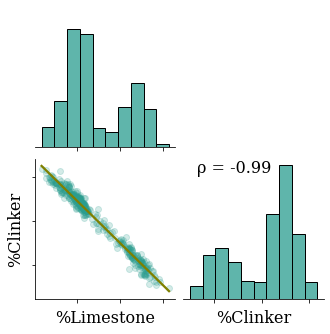

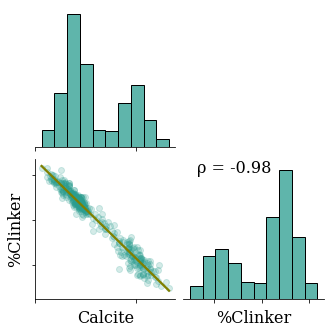

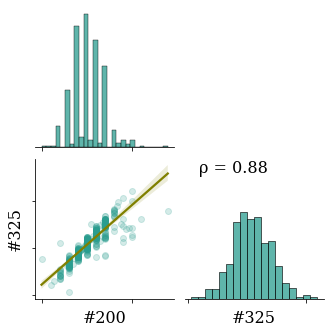

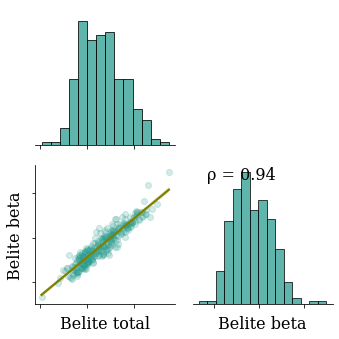

<IPython.core.display.Javascript object>

In [43]:
for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Data/Hora Variable Analyses

In [44]:
dates = df["Date"].copy()
dates

0     2020-01-08
1     2020-01-13
2     2020-01-16
3     2020-01-20
4     2020-01-23
         ...    
416   2022-04-03
417   2022-04-11
418   2022-04-18
419   2022-04-22
420   2022-04-28
Name: Date, Length: 421, dtype: datetime64[ns]

<IPython.core.display.Javascript object>

In [45]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

301 valid days out of 342


<IPython.core.display.Javascript object>

In [46]:
# All years of data
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2020, 2021, 2022}


<IPython.core.display.Javascript object>

In [47]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4}}

<IPython.core.display.Javascript object>

In [48]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        16
      2        13
      3        15
      4        13
      5        15
      6        18
      7        16
      8        15
      9        17
      10       18
      11       12
      12       10
2021  1        10
      2         9
      3        12
      4         9
      5        11
      6        10
      7         9
      8        12
      9        11
      10       10
      11        9
      12       10
2022  1        11
      2         9
      3        13
      4         9
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

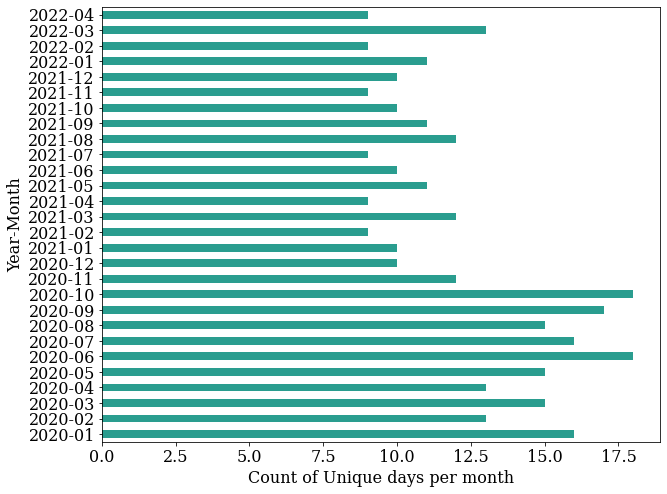

<IPython.core.display.Javascript object>

In [49]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [50]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        23
      2        17
      3        20
      4        15
      5        19
      6        24
      7        22
      8        18
      9        22
      10       23
      11       21
      12       14
2021  1        10
      2        10
      3        12
      4        10
      5        12
      6        11
      7        11
      8        12
      9        12
      10       11
      11       10
      12       10
2022  1        14
      2        13
      3        14
      4        11
Name: size, dtype: int64


<IPython.core.display.Javascript object>

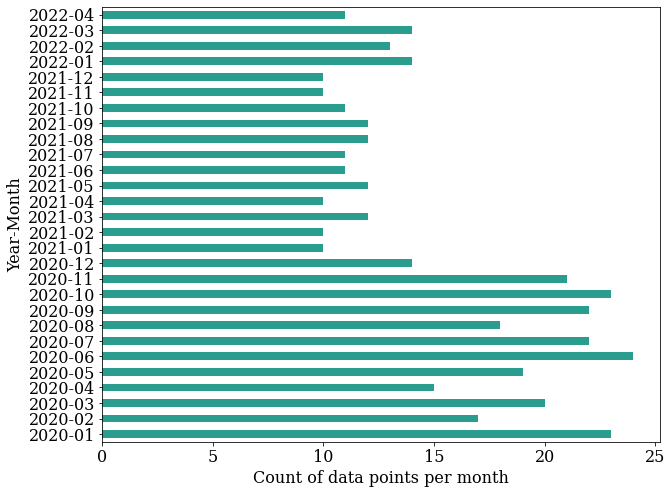

<IPython.core.display.Javascript object>

In [51]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [52]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2021-1 has the minimum number of days with samples - 10
2020-6 has the maximum number of days with samples - 24


<IPython.core.display.Javascript object>

In [53]:
# What is the mean number of observations per year?

mean_obs_per_year = df_year_month.groupby(["Year"]).mean(["size"]).apply(int).to_dict()

print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(df_year_month.mean()))

Mean Number of observations - per year
{2020: 19, 2021: 10, 2022: 13}

Mean number of observations - all years
15


<IPython.core.display.Javascript object>

In [54]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

,DayCount
count,342.000000
mean,1.230994
std,0.449018
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


<IPython.core.display.Javascript object>

In [55]:
day_counts[["DayCount"]].value_counts()

DayCount
1           267
2            71
3             4
dtype: int64

<IPython.core.display.Javascript object>

In [56]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

,Year,Month,Day,DayCount
90,2020,7,1,3
121,2020,9,1,3
159,2020,11,9,3
161,2020,11,12,3


<IPython.core.display.Javascript object>

In [57]:
df_copy = df.copy()
df_copy["Year"] = df_copy["Date"].dt.year
df_copy["Month"] = df_copy["Date"].dt.month
df_copy["Day"] = df_copy["Date"].dt.day

df_merge = df_copy.merge(right=day_counts, how="left", on=["Year", "Month", "Day"])

uniques = df_merge["DayCount"].unique()
uniques.sort()

for daycount in uniques:
    nulls = (
        df_merge[df_merge["DayCount"] == daycount]["28 day Compressive strength"]
        .isna()
        .sum()
    )
    print(daycount, nulls)

1 8
2 2
3 1


<IPython.core.display.Javascript object>

In [58]:
# Here we get the frequency of the whole time series

diffs = []

for i in range(1, len(dates)):
    diffs.append(dates[i] - dates[i - 1])

# Average Frequency
np.mean(diffs)

Timedelta('2 days 00:03:25.714285714')

<IPython.core.display.Javascript object>

In [59]:
Counter(diffs)

Counter({Timedelta('5 days 00:00:00'): 98,
         Timedelta('3 days 00:00:00'): 74,
         Timedelta('4 days 00:00:00'): 65,
         Timedelta('6 days 00:00:00'): 51,
         Timedelta('7 days 00:00:00'): 35,
         Timedelta('2 days 00:00:00'): 32,
         Timedelta('9 days 00:00:00'): 8,
         Timedelta('1 days 00:00:00'): 6,
         Timedelta('8 days 00:00:00'): 18,
         Timedelta('10 days 00:00:00'): 8,
         Timedelta('-848 days +00:00:00'): 1,
         Timedelta('14 days 00:00:00'): 2,
         Timedelta('12 days 00:00:00'): 3,
         Timedelta('13 days 00:00:00'): 5,
         Timedelta('229 days 00:00:00'): 1,
         Timedelta('28 days 00:00:00'): 2,
         Timedelta('98 days 00:00:00'): 1,
         Timedelta('19 days 00:00:00'): 1,
         Timedelta('16 days 00:00:00'): 1,
         Timedelta('-824 days +00:00:00'): 1,
         Timedelta('11 days 00:00:00'): 7})

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='count'>

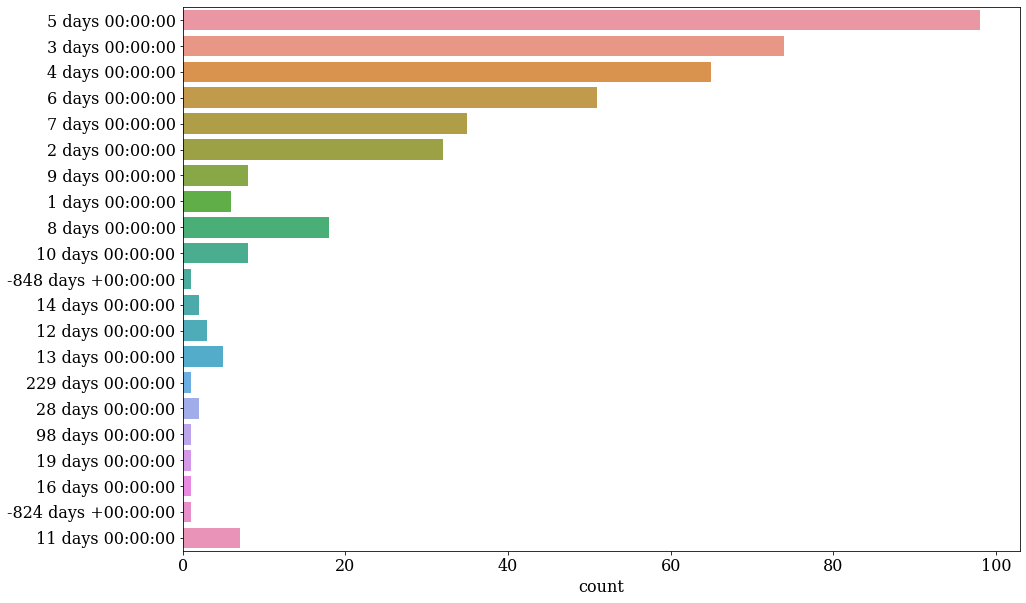

<IPython.core.display.Javascript object>

In [60]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y=diffs)

In [61]:
# percent of diffs
[round(val / df.shape[0] * 100, 2) for val in list(Counter(diffs).values())]

[23.28,
 17.58,
 15.44,
 12.11,
 8.31,
 7.6,
 1.9,
 1.43,
 4.28,
 1.9,
 0.24,
 0.48,
 0.71,
 1.19,
 0.24,
 0.48,
 0.24,
 0.24,
 0.24,
 0.24,
 1.66]

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 3 Days

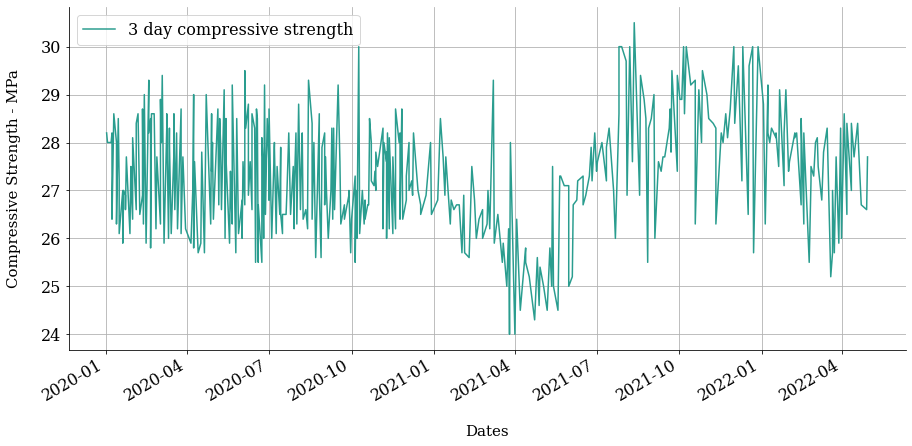

<IPython.core.display.Javascript object>

In [62]:
tmp = df[["Date", "3 day Compressive strength"]].dropna().copy()
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### 7 Days

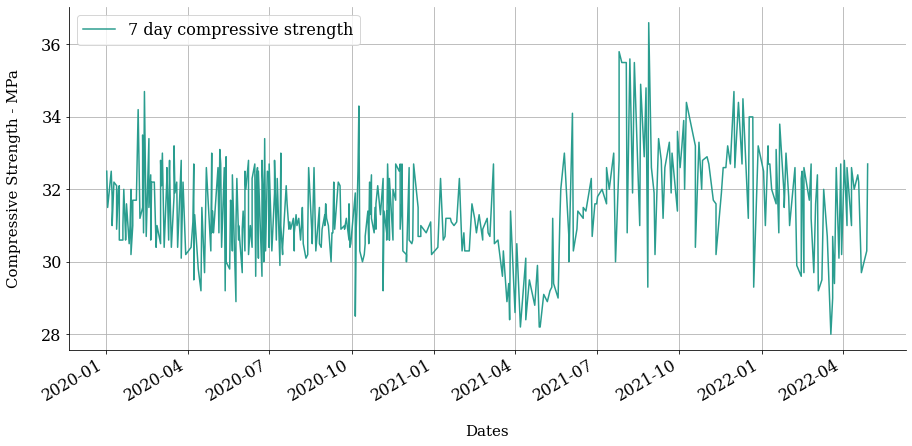

<IPython.core.display.Javascript object>

In [63]:
tmp = df[["Date", "7 day Compressive strength"]].dropna().copy()
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### 28 Days

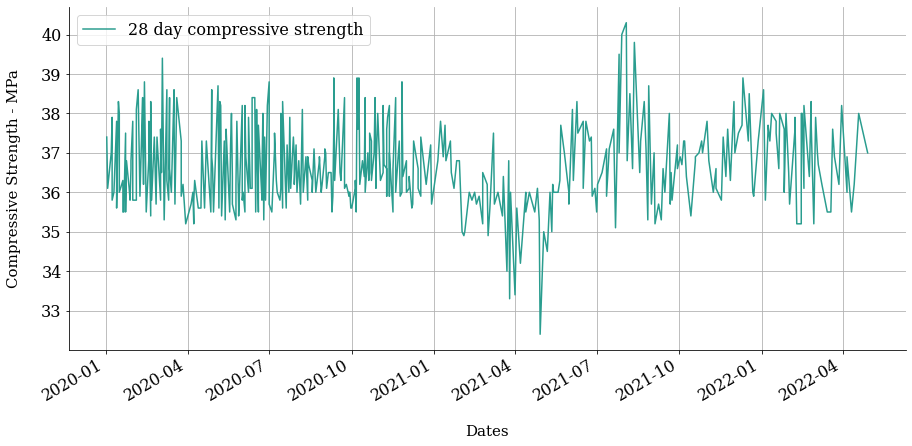

<IPython.core.display.Javascript object>

In [64]:
tmp = df[["Date", "28 day Compressive strength"]].dropna().copy()
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()